In [1]:
!pip install pysolve3

     |████████████████████████████████| 5.3MB 9.3MB/s 
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


Time checking:

In [0]:
from datetime import datetime
t1 = datetime.now()

# Introduction

Jupyter notebook for the simplest model scratch. By convention, all exogenous variables are presented with a overline line (*e.g.* $\overline a$) and the parameters are represented by greek letters (*e.g.* $\alpha$). The code in this document is executable and is strongly recommend to do the follow to ensure that the output is corrected and updated:

Run time > Restart and run all...

# Changes

In this version, the autonomous growth rate is endogenized as a function of housing own interest rates:

$$
g_Z = \phi_0  + \phi_1\cdot \left(\frac{1+r_{mo}}{1+\dot p_h}-1\right)
$$
which

- $\phi_0$ and $\phi_1$ are parameters
- $\dot p_h$ is housing inflation and equals 0 in this version

$$
\dot p_h = \frac{\Delta p_h}{p_{h_{-1}}}
$$

$$
p_h = \xi \cdot p_{h_{-1}} \Rightarrow \dot p_h = \xi -1
$$

## Variables list

- $C$ Consumption
- $CG$: Capital gains
- $FT$: Total profits
- $FD$: Distributed profits
- $FU$: Retained profits
- $g_i$: Growth rate of variable $i$
- $g^e_i$: Expected growth rate of variable $i$
- $h$: Marginal propensity to invest
- $I$: Total investment
- $I_f$: Non-residential investment
- $I_h$: Residential investment
- $K_f$: Non-residential fixed capital
- $K_h$: Residential capital
- $K_{HD}$: Demand for houses
- $K_{HU}$: Unsold houses
- $K_H$: Houses supply
- $L$: Loans
- $morp$: Mortgages repayments
- $M$: Money deposits
- $MO$: Mortgages
- $p_h$ Housing prices
- $r_l$: Interest rates on Loans
- $r_m$: Interest rates on money deposits
- $r_H$: Housing own interest rates
- $S_i$: Sector $i$ savings
- $u$: Capacity utilization ratio
- $v$: Capacity-Output ratio
- $V_i$: Net financial Wealth of sector $i$
- $W$ Total Wage bill
- $Y$: GDP
- $Y_K$: Capacity
- $YD$: Household disposable income
- $Z$: Autonomous expenditures

## Parameters list

- $\alpha$: Propensity to consume out of wages
- $\beta$: Expectation adjustment parameter
- $\gamma_F$: % of distributed profits
- $\gamma_u$: Adjustment parameter for the marginal propensity to invest

## Exogenous variables

- $gz$: Autonomous grouth rate
- $\omega$: Wage share
- $rm$: Interest rates on money deposits
- $spread_l$: Spread for loans
- $spread_{mo}$: Spread for mortgages
- $un$: Normal capacity utilization ratio
- $v$: Capitl-Output ratio

# Assumptions

## General

- No inflation
- Two kinds of capital: Residential and non-Residential
- No depeciation
- Non-residential investment is induced

## Households

- All savings are accumulated in bank deposits
- Households do not have access to Loans


## Firms


## Banks

- Have any net worth

# Matrix

## Balance sheet

|                	| Households 	|  Firms 	| Banks 	| $\sum$ 	|
|----------------	|:----------:	|:------:	|:-----:	|:------:	|
| Money Deposits 	|    $+M$    	|        	|  $-M$ 	|   $0$  	|
|Firms'  Loans          	|            	|  $-L_f$  	|  $+L_f$ 	|   $0$  	|
| Households' Loans          	|   $-L_h$	|   	|  $+L_h$ 	|   $0$  	|
| Mortgages          	| $-MO$           	|   	|  $+MO$ 	|   $0$  	|
| Capital        	|    |  $K_f$ 	|       	|   $K_f$  	|
| Houses 	|    $K_{HD}$    	| |  	|   $K_H$  	|
| Net Worth      	|   $V_h$   	| $V_f$ 	| $V_b$      	|  $K$  	|


## Transactions and flow  of funds matrix

|                            	|Households             	| Households  	| Firms                  	| Firms       	| Banks                  	|  Sum    	|
|----------------------------	|------------------------	|-------------	|------------------------	|-------------	|------------------------	|-------------	|
|                            	| Current                	| Capital     	| Current                	| Capital     	| Current                	| $\sum$ 	|
| Consumption                	| $-C$                   	|             	| $+C$                   	|             	|                        	|             	$0$    	|
| Investment                 	|                  	|             	| $+I_f$                    	| $-I_f$      	|                        	|             	$0$    	|
| Residential Investment                 	|                  	| $-I_h$            	| $+I_h$                    	|       	|                        	|             	 $0$    	|
| **[Production]**               	|                        	|             	| **[$Y$]**                  	|             	|                        	|             	$[Y]$    	|
| Wages                      	| $+W$                    	|             	| $-W$                   	|             	|                        	|             	$0$    	|
| Profits                      	| $+FD$                    	|             	| $-FT$                   	| $+FU$	|                        	|             	$0$    	|
| Interests on loans         	|  $-r_{l-1}\cdot L_{h_{-1}}$ 	|             	| $-r_{l-1}\cdot L_{f_{-1}}$ 	|             	| $+r_{l-1}\cdot L_{-1}$ 	|             	$0$    	|
| Interests on Bank deposits 	| $+r_{m-1}\cdot M_{-1}$ 	|             	|                        	|             	| $-r_{m-1}\cdot M_{-1}$ 	|             	$0$    	|
| Interests on Mortgage 	| $-r_{mo-1}\cdot MO_{-1}$ 	|             	|                        	|             	| $+r_{mo-1}\cdot MO_{-1}$  	|             	$0$    	|
| **Subtotal** 	| $+S_h$ 	| $-I_h$|                        	|  $+NFW_f$           	|  +$NFW_b$	|             	 $0$    	|
| Change in firms Loans            	|                        	|             	|                        	| $+\Delta L_f$ 	|                        	 $-\Delta L_f$ 	|$0$    	|
| Household new loans           	|$+N$|             	|                        	|  	|                        	 $-N$ 	|$0$    	|
| Change in Bank deposits    	| $-\Delta M$                       	|  	|                        	|             	|                        	$+\Delta M$ 	| $0$    	|
| Change in Mortgages    	|                        	| $+\Delta MO$ 	|                        	|             	|                        	$-\Delta MO$ 	| $0$    	|
| Sum    	| $0$                        	| $0$ 	| $0$| $0$| $0$| $0$| 

# Equations

## General Equations

$$
Y = C + I
$$

$$
I = I_f + I_h
$$

$$
\omega = \overline \omega
$$

$$
W = \omega \cdot  Y
$$

$$
Y_K = \frac{K_f}{\overline v}
$$

$$
u = \frac{Y}{Y_K}
$$

$$
g_k = \frac{h\cdot u}{v}
$$

$$
Z = I_h + N
$$

$$
K = K_f + K_{HD}
$$

## Households

$$
YD = W + FD + \overline r_{m-1}\cdot M_{-1} - \overline r_{mo-1}\cdot MO - r_l\cdot{L_h}
$$


$$
S_h = YD - C = \Delta M
$$

$$
C = \alpha\cdot W + N
$$

$$
\Delta L_h = N
$$

$$
N = (\Theta)\cdot I_{h_{-2}}
$$

$$
\Delta MO = I_h
$$

$$
V_h = M + K_H - MO - L_h
$$

$$
NFW_h = S_h - I_h
$$

## Firms

$$
\Delta L_f = I_f - FU
$$

$$
FT = Y - W = FU+ FD
$$

$$
FU = \gamma_F\cdot (FT - r_{L_{-1}}\cdot L_{f_{-1}})
$$


$$
FD = (1 - \gamma_F)\cdot (FT - r_{L_{-1}}\cdot L_{f_{-1}})
$$

$$
I_f = h\cdot Y
$$

$$
\Delta K_f = I_f
$$

$$
\Delta h = 
h_{-1}\cdot \gamma_u\cdot (u - \overline u_n)
$$

$$
V_f = K_f  - L_f
$$

$$
NFW_f = FU - I_f
$$

## Banks

$$
L = L_f + L_h
$$

$$
\Delta M = \Delta L + \Delta MO
$$

$$
NFW_b = rl_{-1}\cdot L_{-1} + rmo_{-1}\cdot MO_{-1} - rm_{-1}\cdot M_{-1}
$$

$$
r_l = r_m + spread_l (=0)
$$

$$
r_{mo} = r_m + spread_{mo} (=0)
$$

$$
V_b = L + MO - M
$$

## Residential Investment


$$
K_{HS} = K_{HD}
$$

$$
I_h^S = I_h
$$

$$
\Delta K_{HD} = I_h
$$

$$
I_h = (1+g_Z)\cdot I_{h_{-1}}
$$


$$
k = \frac{K_h}{K}
$$

# Simulation setup

## Loading libraries

In [0]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns
import sympy as sp
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import networkx as nx

plt.style.use('seaborn-white')

from pysolve3.utils import ShockModel, SFCTable, SolveSFC, SummaryShock
from pysolve3.model import Model



# Creating model function

In [0]:
def model(
    alpha = 1,
    gamma_F = 0.4,
    gamma_u = 0.01,
    g_Z = 0.05,
    omegapar = 0.5,
    rm = 0.02,
    spread_l = 0,
    spread_mo = 0,
    un = 0.8,
    v = 2.5,
    Theta = 0.35,
    phi_0 = 0.04,
    phi_1 = 0.5,
    infla = 0,
    phparam=1.0
):
  """
  phparam: 1.0 means no inflation
  """
  model = Model()
  model.set_var_default(0) 
  model.var('C', desc='Consumption')
  model.var('FD', desc='Distributed profits')
  model.var('Fn', desc='Net profits')
  model.var('FT', desc='Total Profits')
  model.var('FU', desc='Retained profits')
  model.var('gk', desc='Capital growth rate', default=0.01)
  model.var('g_Z', desc='Autonomous grouth rate', default=g_Z)
  model.var('h', desc='Marginal propensity to invest (non-residential)', default=0.30)
  model.var('I_t', desc='Investment', default = 100) # 200
  model.var('I_f', desc='Non-residential investment') # 100
  model.var('I_h', desc='Residential investment', default = 100) # 100
  model.var('Is', desc='Residential investment (Supply)', default = 100) # 100
  model.var('infla', desc='Housing inflation', default = phparam)
  model.var('K_HS', desc='Houses supply', default=500) # 500
  model.var('K_HD', desc='Houses demand', default=500) # 500
  model.var('K_f', desc='Non-residential capital', default = 1000) # 10000
  model.var('K', desc='Capital', default=1500)
  model.var('Kreal', desc='Capital', default=1500)
  model.var('k', desc="% of Kf in total")
  model.var('L', desc='Total Loans') # 100
  model.var('Lf', desc='Firms Loans') # 100
  model.var('Lh', desc='Household Loans') # 100
  model.var('M', desc='Money deposits', default = 305) # 300
  model.var('MO', desc='Mortgages', default = 305) # 200
  model.var('N', desc='New Loans', default = 100) # 200
  model.var('NFW_h', desc='Households Net Financial Wealth')
  model.var('NFW_f', desc='Firms Net Financial Wealth')
  model.var('NFW_b', desc='Banks Net Financial Wealth')
  model.var('omega', desc='Wage-share', default = 0.5)
  model.var('own', desc='Own interest rate')
  model.var('ph', desc='House price', default = 1)
  model.var('rl', desc='Interests rates on loans')
  model.var('rmo', desc='Interests rates on mortgages')
  model.var('S_h', desc='Households savings', default = 100)
  model.var('u', desc='Capacity utilization ratio', default=0.7)
  model.var('V_h', desc='Household net financial wealth', default = 500)
  model.var('V_f', desc='Firms net financial wealth', default = 1000)
  model.var('V_b', desc='Banks net financial wealth')
  model.var('W', desc='Wages')
  model.var('Y', desc='GDP')
  model.var('Yk', desc='Capacity')
  model.var('YD', desc='Household disposable income')
  model.var('Z', desc='Autonomous expenditures')
  
  model.param('alpha', desc='Propensity to consume out of wages', default=alpha) # 0.7
  model.param('gamma_F', desc='% of undistributed profits', default=gamma_F) # 0.4
  model.param('gamma_u', desc='Adjustment parameter for the marginal propensity to invest', default=gamma_u) # 0.01
  model.param('omegapar', desc='Wage-share', default=omegapar) # 0.5
  model.param('rm', desc='Interest rates on money deposits', default=rm) # 0.02
  model.param('spread_l', desc='Spread for loans', default=spread_l) # 0.01
  model.param('spread_mo', desc='Spread for mortgages', default=spread_mo) # 0.005
  model.param('Theta', desc = 'Lag paramets', default = Theta)
  model.param('un', desc='Normal capacity utilization ratio', default=un) # 0.8
  model.param('v', desc='Capitl-Output ratio', default=v) # 2.5
  model.param('phi_0', desc='Autonomous housing investment component',default = phi_0)
  model.param('phi_1', desc='Housing investment sensitivity to own interest rate', default = phi_1)
  model.param('phparam', desc='ph parameter', default = phparam)
  model.param('inflaparam', desc='infla value', default = infla)
  
  
  # General equations
  model.add('Y = C + I_t') # Eq1
  model.add('I_t = I_f + I_h') # Eq2
  model.add('omega = omegapar') # Eq 3
  model.add('Yk = K_f(-1)/v') # Eq 4
  model.add('u = Y/Yk') # Eq 5
  model.add('W = omega*Y') # Eq 6
  model.add('gk = h*u/v') # Eq 7
  model.add('K = K_HD*ph + K_f') # Eq 8 ################################### Changes #################################################
  model.add('Kreal = K_HD + K_f') # Eq 8 ################################### Changes #################################################
  model.add('Z = I_h + N') # Eq 9
  
  # Household equations
  model.add('YD = W + FD + rm*M(-1) - rmo*MO(-1) - rl*Lh(-1)') # Eq 10
  model.add('S_h = YD - C') # Eq 11
  model.add('d(MO) = I_h') # Eq 12
  #odel.add('N = Theta*I_h(-2)') # Eq 12
  model.add('N = Theta*K_HD(-5)*ph(-5)') # Eq 12 ################################### Changes #################################################
  model.add('d(Lh) = N') # Eq 13
  model.add('C = alpha*W + N') # Eq 14
  model.add('V_h = M + K_HD*ph - MO - Lh') # Eq 15 ################################### Changes #################################################
  model.add('NFW_h = S_h - I_h') # Eq 16
  
  # Firms
  model.add('d(Lf) = I_f - FU') # Eq 15
  model.add('FT = (1-omega)*Y') # Eq 16
  model.add('Fn = FT -rl*Lf(-1)')
  model.add('FU = gamma_F*(Fn)') # Eq 17
  model.add('FD = (1 - gamma_F)*(Fn)') # Eq 18
  model.add('I_f = h*Y') # Eq 19
  model.add('d(K_f) = I_f') # 20
  model.add('h = h(-1)*gamma_u*(u-un) + h(-1)') # Eq 21 # Version without corridor
  model.add('V_f = K_f - Lf') # Eq 22
  model.add('NFW_f = FU - I_f') # Eq 23
  
  # Banks
  model.add('L = Lf + Lh')
  model.add('d(M) = d(L) + d(MO)') # Eq 24
  model.add('rmo = rm + spread_mo') # Eq 25
  model.add('rl = rm + spread_l') # Eq 26
  model.add('V_b = L + MO - M') # Eq 27
  model.add('NFW_b = rl*L(-1) + rmo*MO(-1) - rm*M(-1)') # Eq 28
  
  # Residential investment
  model.add('K_HS = K_HD') # Eq 29
  model.add('Is = I_h')
  model.add('d(K_HD) = I_h*ph(-1) + K_HD(-1)*d(ph)') # Eq 30 ################################### Changes #################################################
  #model.add('d(K_HD) = I_h') # Eq 30
  model.add('I_h = (1+g_Z)*I_h(-1)') # Eq 31
  model.add('k = K_HD(-1)/(Kreal(-1))') ################################### Changes #################################################
  #model.add('infla = d(ph)/ph(-1)') ################################### Changes #################################################
  model.add('infla = inflaparam') ################################### Changes #################################################
  model.add('ph =(1+infla)*ph(-1)') ################################### Changes #################################################
  model.add('own = ((1+rmo)/(1+infla)) -1') ################################### Changes #################################################
  model.add('g_Z = phi_0 - phi_1*own') ################################### Changes #################################################
  
  # Aditionals
#  model.add('Debt_H = rmo*MO(-1)/YD')
#  model.add('Debt_F = rl*L(-1)/FU')
#  model.add('Depo = rm*M(-1)/YD')
  return model

# Evaluating consistenty

In [5]:
test = model()
SolveSFC(test, time=10, table = False)
evaldf = pd.DataFrame({
    'Households' : test.evaluate('M - MO - Lh + K_HD*ph - V_h'), ################################### Changes #################################################
    'Firms' : test.evaluate('K_f - Lf - V_f'),
    'Banks' : test.evaluate('L + MO - M - V_b'),
    'Mortgages' : test.evaluate('MO(-1) - MO(-2) - I_h(-1)'),
    'Financial assets' : test.evaluate('d(MO) + d(L) - d(M)'),
    '[Total Financial Wealth - K]' : test.evaluate('V_f + V_h + V_b - K'),
    "Firm's Funds" : test.evaluate('Lf(-1) - Lf(-2) - I_f(-1) + FU(-1)'),
    "Housing" : test.evaluate('K_HD - K_HS'),
    "[Net Financial Wealth]" : test.evaluate('NFW_h + NFW_f + NFW_b'),
    "Investment" : test.evaluate('I_t - I_h - I_f'),
    "Profits" : test.evaluate('FT(-1) - rl*Lf(-2) - FU(-1) - FD(-1)'),
    "Wages" : test.evaluate('W - omega*Y')
}, index = ['Sum'])
evaldf = evaldf.transpose()
evaldf.round(5)

,Sum
Households,0.00228
Firms,0.00000
Banks,0.00000
Mortgages,0.00000
Financial assets,0.00000
[Total Financial Wealth - K],0.00268
Firm's Funds,-0.00201
Housing,0.00000
[Net Financial Wealth],-0.01499
Investment,-0.00495


# Solving

In [6]:
base = model()
df = SolveSFC(base, time=1000)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000
C,0.00,900.780179,1.068894e+03,1.244004e+03,1.425775e+03,1.012749e+03,1.170224e+03,1.333684e+03,1.502929e+03,1.677805e+03,1.858172e+03,2.043884e+03,2.234803e+03,2.430832e+03,2.631865e+03,2.837813e+03,3.048634e+03,3.264261e+03,3484.692531,3.709892e+03,3.939894e+03,4.174692e+03,4.414354e+03,4.658898e+03,4.908426e+03,5.162978e+03,5.422685e+03,5.687609e+03,5.957907e+03,6.233659e+03,6.515047e+03,6.802194e+03,7.095230e+03,7.394369e+03,7.699733e+03,8.011557e+03,8.329978e+03,8.655250e+03,8.987523e+03,9.327072e+03,...,5.286217e+15,5.444804e+15,5.608148e+15,5.776393e+15,5.949684e+15,6.128175e+15,6.312020e+15,6.501381e+15,6.696423e+15,6.897316e+15,7.104246e+15,7.317373e+15,7.536894e+15,7.763014e+15,7.995892e+15,8.235757e+15,8.482829e+15,8.737314e+15,8.999434e+15,9.269417e+15,9.547500e+15,9.833925e+15,1.012894e+16,1.043281e+16,1.074580e+16,1.106817e+16,1.140021e+16,1.174222e+16,1.209449e+16,1.245732e+16,1.283104e+16,1.321597e+16,1.361245e+16,1.402083e+16,1.444145e+16,1.487472e+16,1.532094e+16,1.578057e+16,1.625398e+16,1.674160e+16
FD,0.00,435.468107,5.128165e+02,5.932179e+02,6.764185e+02,4.919857e+02,5.622146e+02,6.349646e+02,7.100725e+02,7.874017e+02,8.668280e+02,9.482226e+02,1.031463e+03,1.116453e+03,1.203090e+03,1.291283e+03,1.380971e+03,1.472077e+03,1564.564204,1.658375e+03,1.753494e+03,1.849882e+03,1.947543e+03,2.046454e+03,2.146638e+03,2.248083e+03,2.350830e+03,2.454879e+03,2.560285e+03,2.667059e+03,2.775268e+03,2.884945e+03,2.996129e+03,3.108903e+03,3.223299e+03,3.339411e+03,3.457277e+03,3.577001e+03,3.698626e+03,3.822266e+03,...,2.173705e+15,2.238916e+15,2.306084e+15,2.375266e+15,2.446524e+15,2.519920e+15,2.595517e+15,2.673383e+15,2.753584e+15,2.836192e+15,2.921284e+15,3.008922e+15,3.099190e+15,3.192173e+15,3.287930e+15,3.386561e+15,3.488158e+15,3.592802e+15,3.700586e+15,3.811604e+15,3.925952e+15,4.043730e+15,4.165042e+15,4.289993e+15,4.418693e+15,4.551254e+15,4.687791e+15,4.828425e+15,4.973277e+15,5.122475e+15,5.276150e+15,5.434434e+15,5.597467e+15,5.765391e+15,5.938352e+15,6.116516e+15,6.299998e+15,6.488998e+15,6.683667e+15,6.884177e+15
FT,0.00,725.780179,8.578437e+02,9.958226e+02,1.139348e+03,8.377491e+02,9.591737e+02,1.085502e+03,1.216502e+03,1.351985e+03,1.491778e+03,1.635698e+03,1.783572e+03,1.935263e+03,2.090630e+03,2.249540e+03,2.411913e+03,2.577639e+03,2746.671186,2.918930e+03,3.094404e+03,3.273037e+03,3.454849e+03,3.639808e+03,3.827963e+03,4.019301e+03,4.213898e+03,4.411759e+03,4.612980e+03,4.817585e+03,5.025691e+03,5.237357e+03,5.452648e+03,5.671709e+03,5.894594e+03,6.121463e+03,6.352381e+03,6.587526e+03,6.826967e+03,7.070899e+03,...,3.036278e+15,3.127366e+15,3.221187e+15,3.317823e+15,3.417358e+15,3.519879e+15,3.625475e+15,3.734239e+15,3.846267e+15,3.961655e+15,4.080515e+15,4.202931e+15,4.329019e+15,4.458902e+15,4.592656e+15,4.730424e+15,4.872337e+15,5.018507e+15,5.169063e+15,5.324135e+15,5.483859e+15,5.648375e+15,5.817826e+15,5.992361e+15,6.172132e+15,6.357296e+15,6.548015e+15,6.744456e+15,6.946790e+15,7.155193e+15,7.369849e+15,7.590945e+15,7.818673e+15,8.053234e+15,8.294831e+15,8.543698e+15,8.799986e+15,9.063986e+15,9.335906e+15,9.615983e+15
FU,0.00,290.312071,3.418777e+02,3.954786e+02,4.509456e+02,3.279905e+02,3.748098e+02,4.233097e+02,4.733816e+02,5.249345e+02,5.778854e+02,6.321484e+02,6.876423e+02,7.443019e+02,8.020599e+02,8.608554e+02,9.206473e+02,9.813848e+02,1043.042803,1.105583e+03,1.168996e+03,1.233255e+03,1.298362e+03,1.364303e+03,1.431092e+03,1.498722e+03,1.567220e+03,1.636586e+03,1.706857e+03,1.778039e+03,1.850178e+03,1.923297e+03,1.997419e+03,2.072602e+03,2.148866e+03,2.226274e+03,2.304851e+03,2.384667e+03,2.465750e+03,2.548177e+03,...,1.449137e+15,1.492611e+15,1.537389e+15,1.583511e+15,1.631016e+15,1.679947e+15,1.730345e+15,1.782255e+

# Baseline Plots

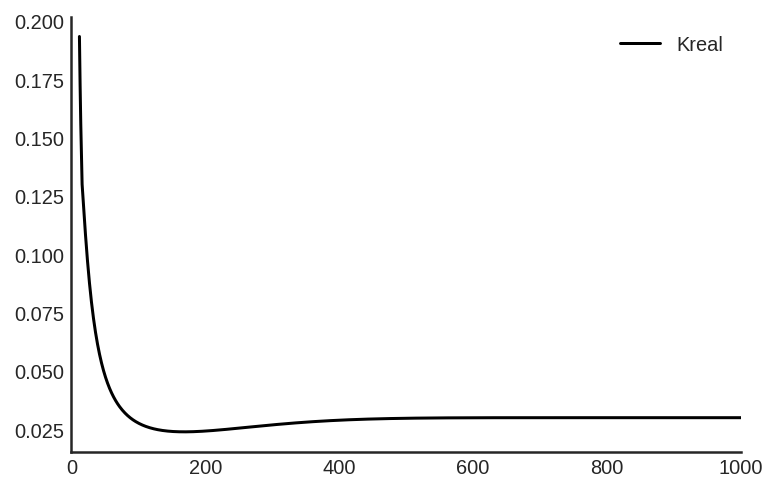

In [7]:
fig, ax = plt.subplots()

df[["Kreal"]].pct_change().rolling(12).mean().plot(ax=ax, color='black')
sns.despine()
plt.show()

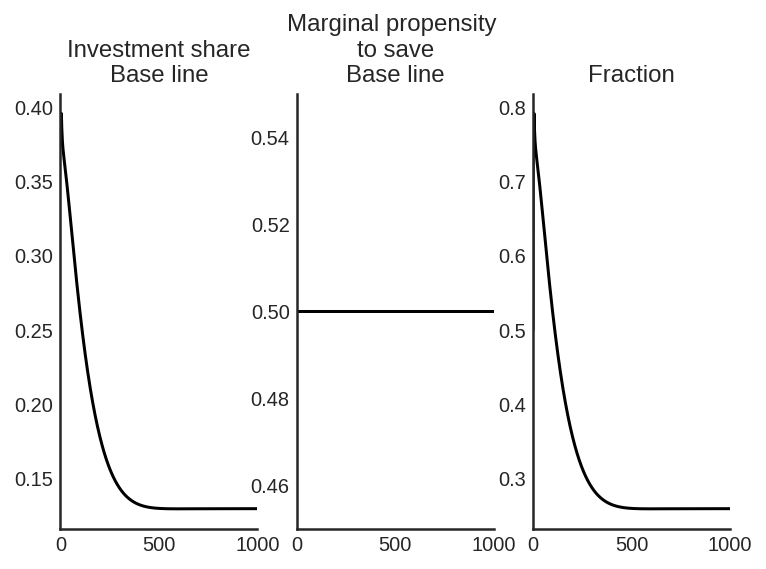

In [8]:
fig, ax = plt.subplots(1,3)

(df['I_t']/df['Y']).plot(title = 'Investment share\nBase line', color = 'black', ax = ax[0])
(1 - df['omega']).plot(title = 'Marginal propensity \nto save\nBase line', color = 'black', ax = ax[1])
ax[1].set_ylim(.45,.55)
(df['I_t']/(df['I_t'] + df['N'])).plot(title = 'Fraction', color = 'black', ax = ax[2])

sns.despine()
plt.show()

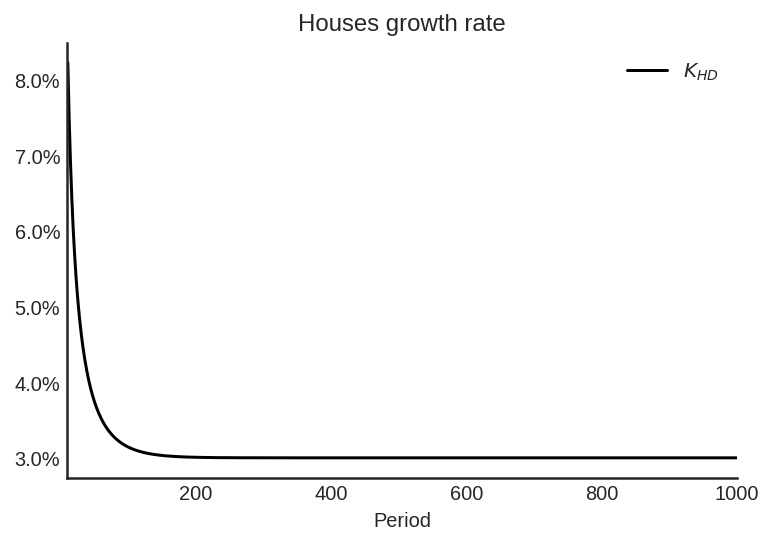

In [9]:
ax = df['K_HD'][10:].pct_change().plot(color = "black", title = "Houses growth rate", label = "$K_{HD}$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

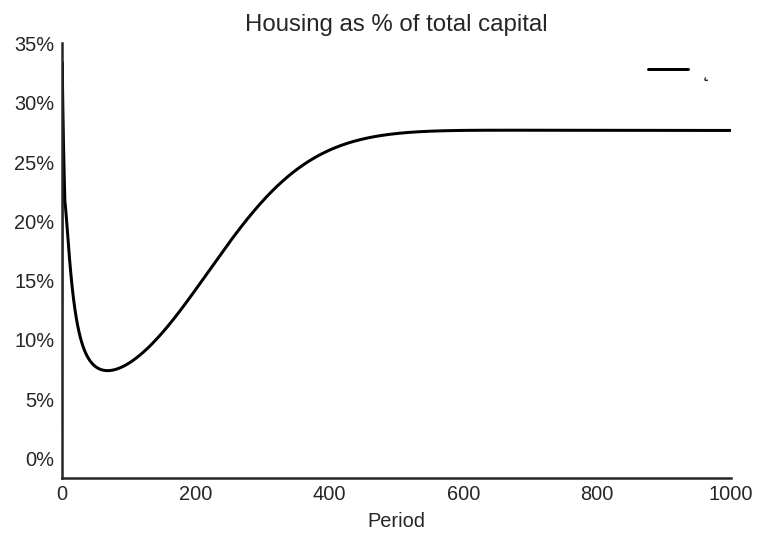

In [10]:
ax = df['k'].plot(color = "black", title = "Housing as % of total capital", label = "$\\k$", legend = True)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.xlabel("Period")
sns.despine()
plt.show()

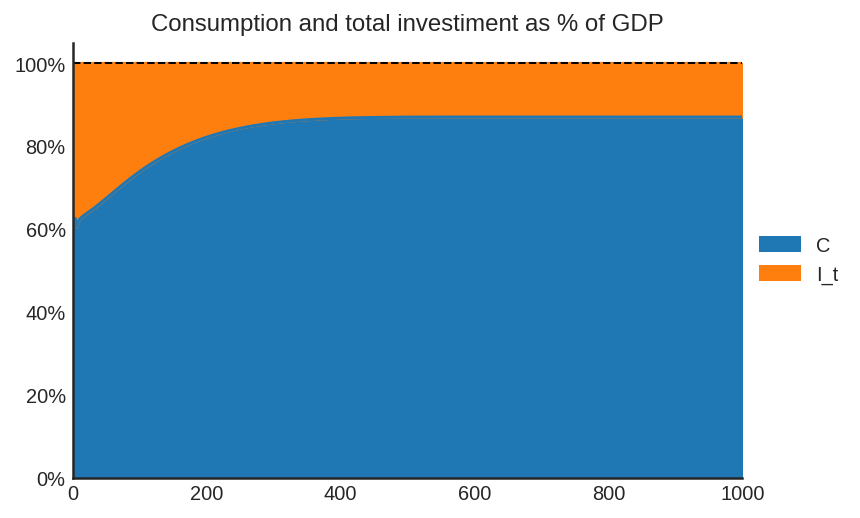

In [11]:
ax = df[['C', 'I_t']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Consumption and total investiment as % of GDP")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

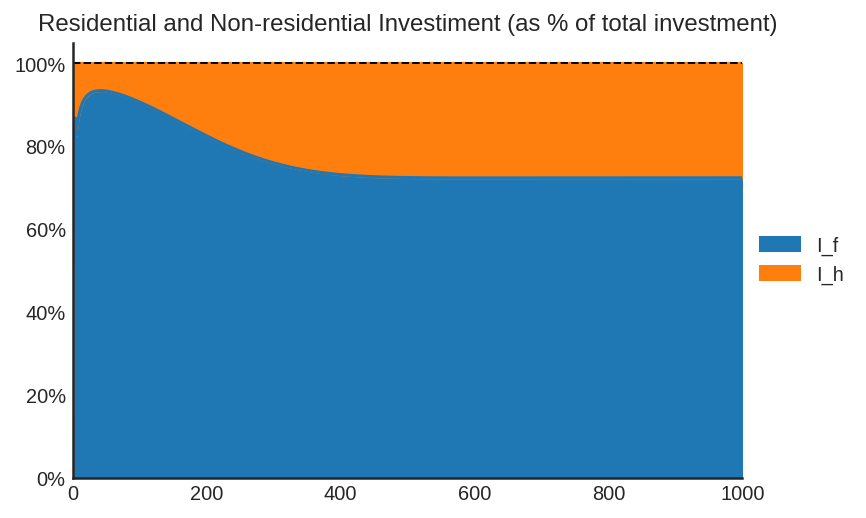

In [12]:
ax = df[['I_f', 'I_h']].apply(lambda x: x/df['I_t']).plot(kind = 'area', stacked = True, legend = True, title = "Residential and Non-residential Investiment (as % of total investment)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

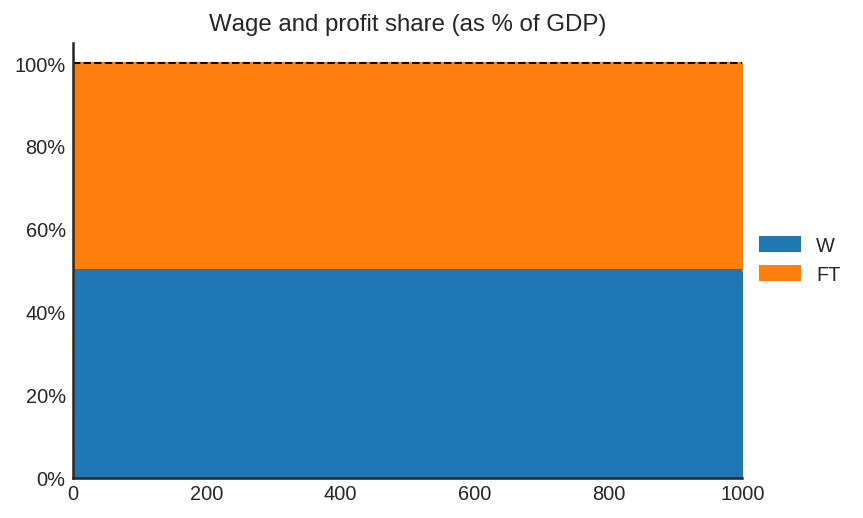

In [13]:
ax = df[['W', 'FT']].apply(lambda x: x/df['Y']).plot(kind = 'area', stacked = True, legend = True, title = "Wage and profit share (as % of GDP)")
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

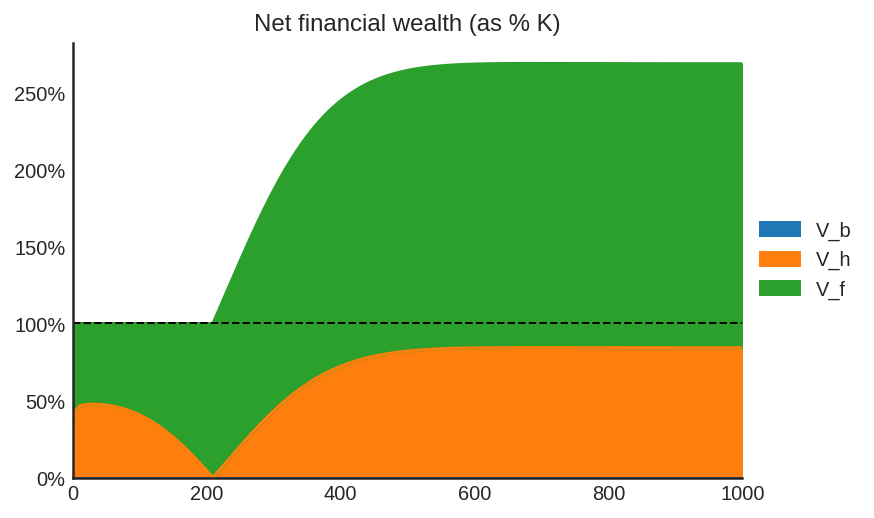

In [14]:
ax = df[['V_b', 'V_h', 'V_f']].apply(lambda x: np.abs(x)/df['K']).plot(kind = 'area', stacked = True, title = "Net financial wealth (as % K)")
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=1, color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

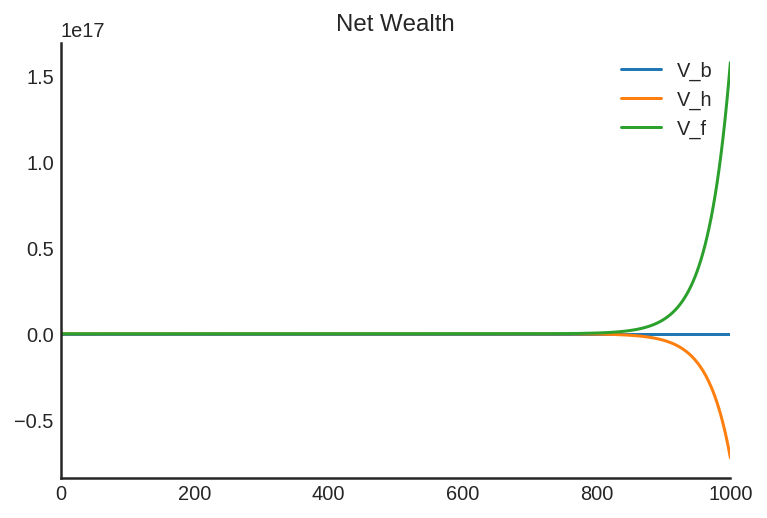

In [15]:
df[["V_b", "V_h", "V_f"]].plot(title = "Net Wealth")
sns.despine()
plt.show()

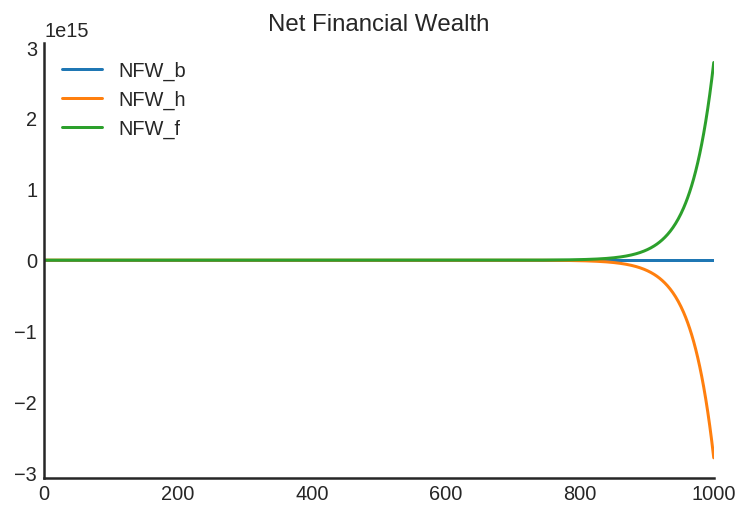

In [16]:
df[["NFW_b", "NFW_h", "NFW_f"]].plot(title = "Net Financial Wealth")
sns.despine()
plt.show()

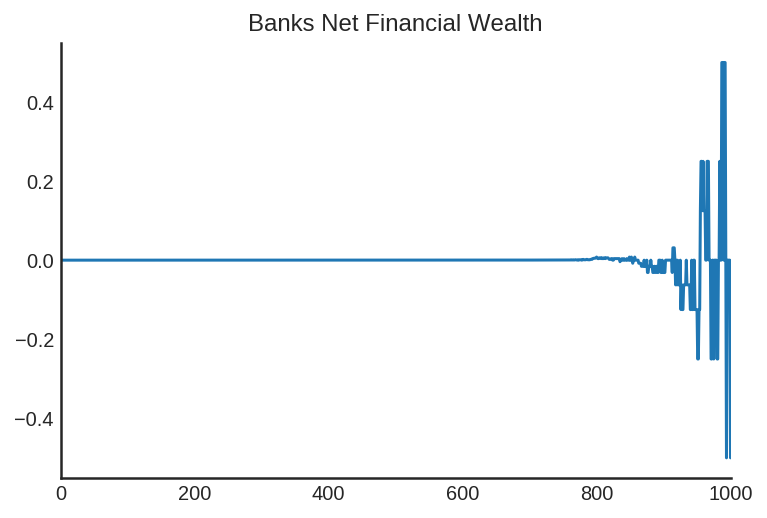

In [17]:
df['NFW_b'].plot(title = "Banks Net Financial Wealth")
sns.despine()
plt.show()

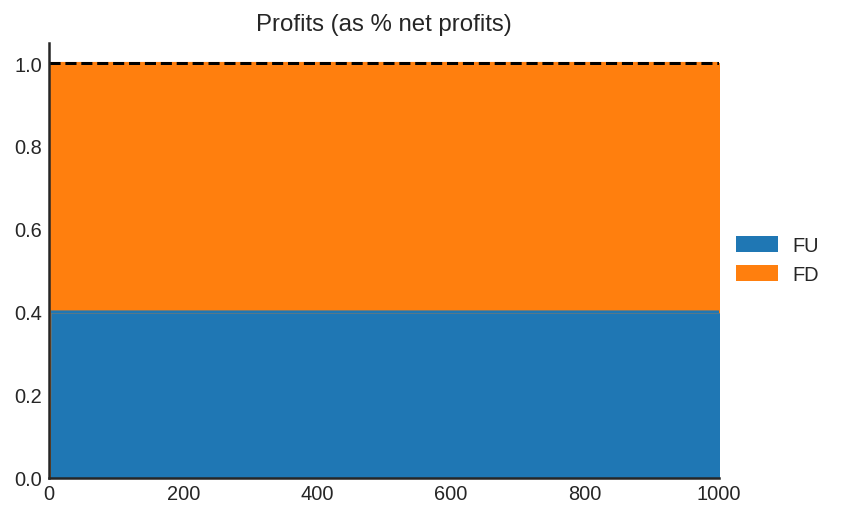

In [18]:
ax = df[["FU", "FD"]].apply(lambda x: x/df["Fn"]).plot(kind = "area", stacked = True, title = "Profits (as % net profits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "black", ls = "--")
sns.despine()
plt.show()

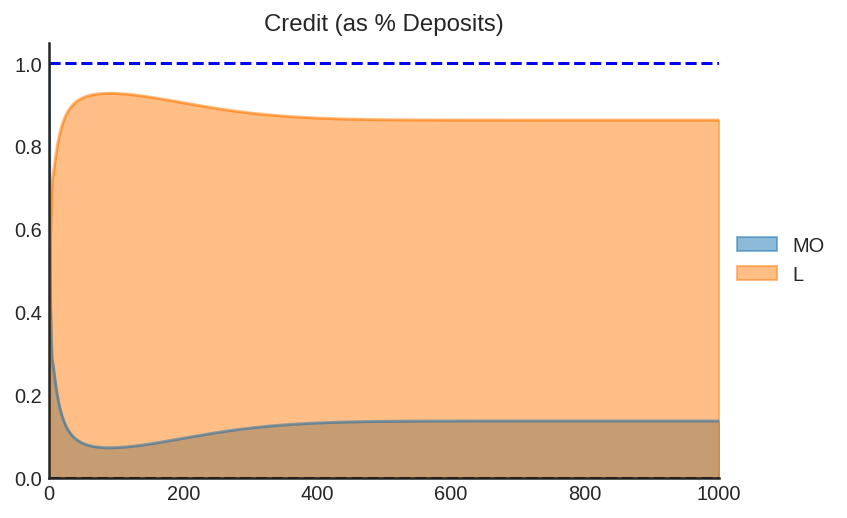

In [19]:
ax = df[["MO", "L"]].apply(lambda x: x/df["M"]).plot(kind = "area",stacked = False ,title = "Credit (as % Deposits)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.axhline(y = 1, color = "blue", ls = "--")
ax.axhline(y = 0, color = "black", ls = "--")
sns.despine()
plt.show()

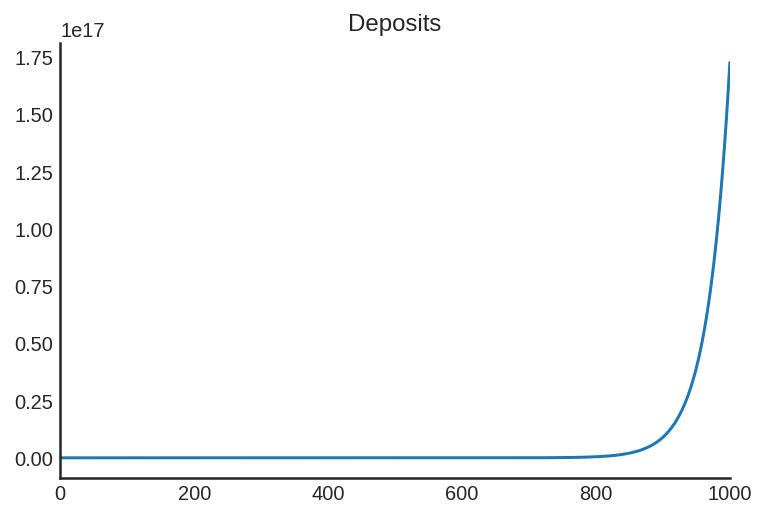

In [20]:
df["M"].plot(title = "Deposits")
sns.despine()
plt.show()

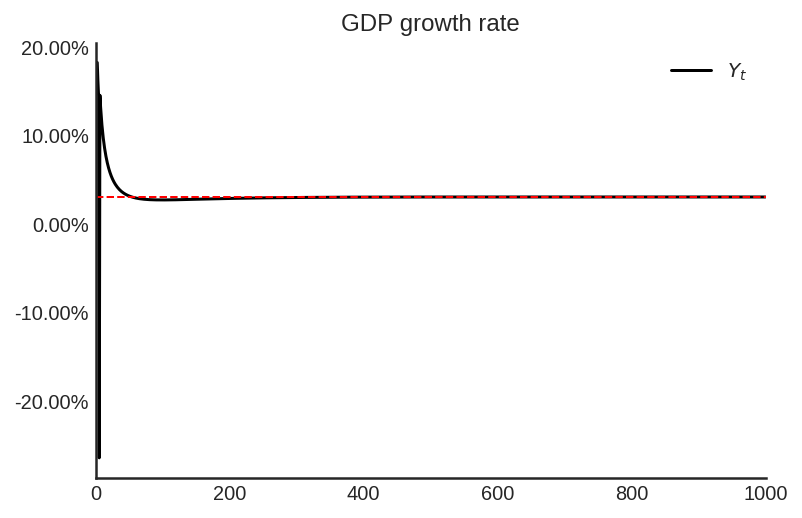

In [21]:
ax = df['Y'].pct_change().plot(color = "black", title = "GDP growth rate", label = "$Y_t$", legend = True)
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["g_Z"].iloc[-1], color = "red", ls = "--", lw=1, label = "Autonomous growth rate")
sns.despine()
plt.show()

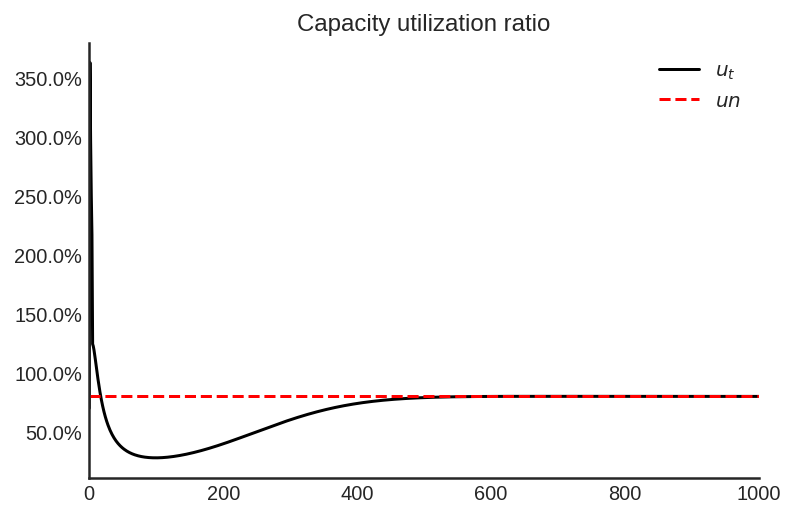

In [22]:
ax = df['u'].plot(color = "black", title = "Capacity utilization ratio", label = "$u_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
ax = df['un'].plot(color = "red", ls="--",  title = "Capacity utilization ratio", label = "$un$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

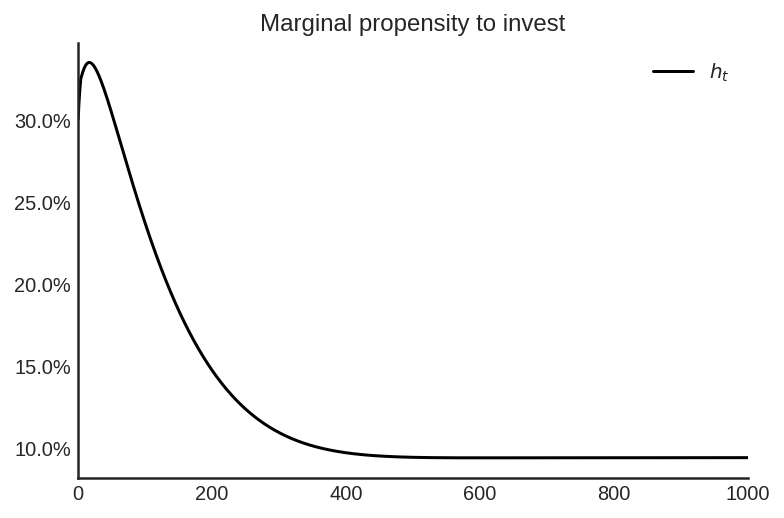

In [23]:
ax = df['h'].plot(color = "black", ls="-",  title = "Marginal propensity to invest", label = "$h_t$", legend = True)
ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
sns.despine()
plt.show()

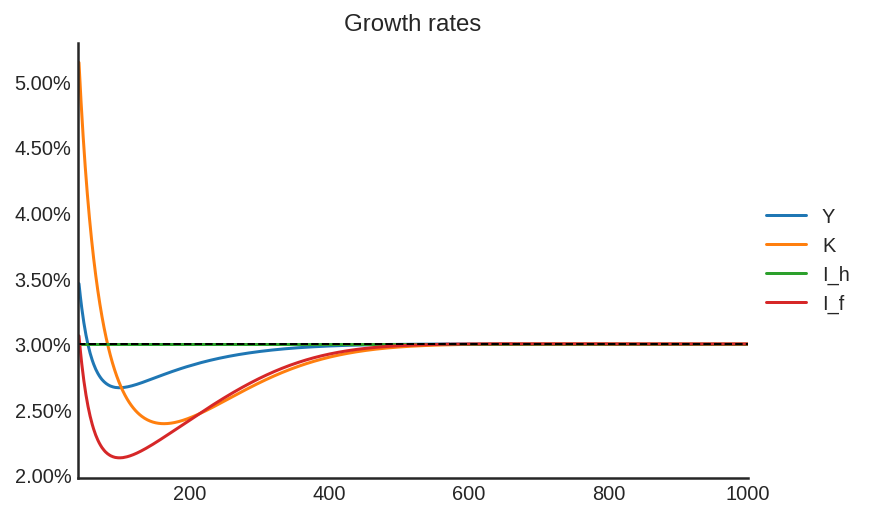

In [24]:
ax = df[["Y", "K", "I_h", "I_f"]][40:].pct_change().plot(title = "Growth rates")
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])
ax.axhline(y=df["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine()
plt.show()

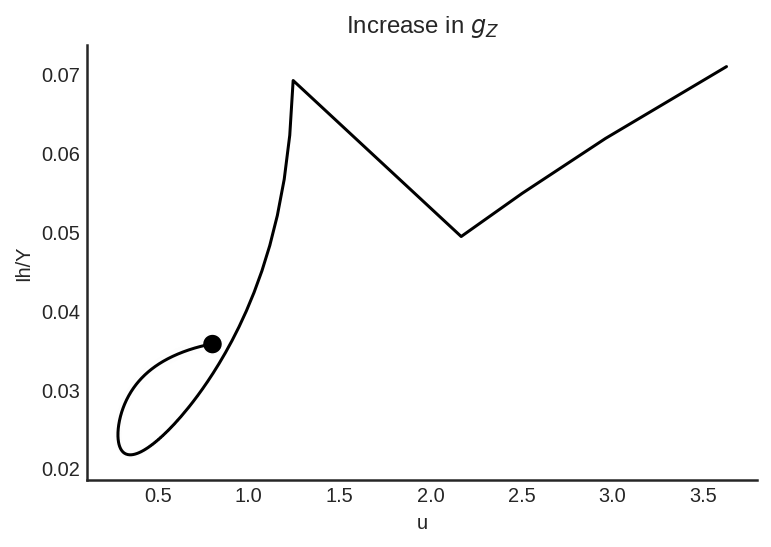

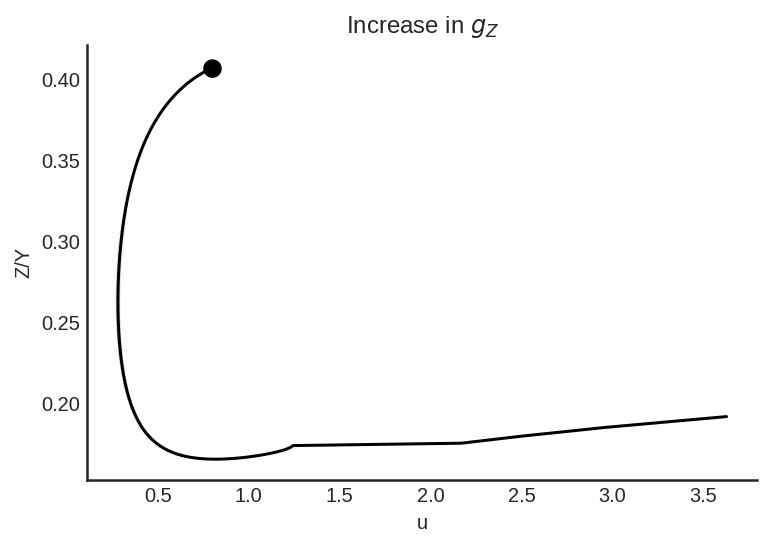

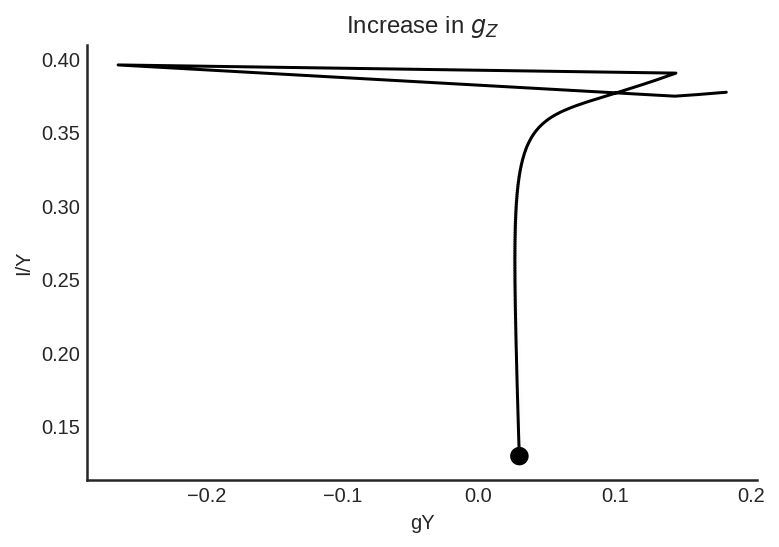

In [25]:
df["TIME"] = [i+1 for i in range(len(df.index))]
df["Ih/Y"] = df["I_h"]/df["Y"]
df["I/Y"] = df["I_t"]/df["Y"]
df["Z/Y"] = df["Z"]/df["Y"]
df["gY"] = df["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Ih/Y', x='u', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'Z/Y', x='u', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Z/Y', x='u', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'I/Y', x='gY', data=df, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'I/Y', x='gY', data=df, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

# Shocks

## Increase in autonomous growth rate ($g_z$)

In [26]:
base = model()
df = SolveSFC(base, time=900)
shock = ShockModel(base_model=base, create_function=model(), variable='phi_0', increase=0.01, time = 1200)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250
C,8.711101e+14,1.004290e+15,1.034540e+15,1.065694e+15,1.097786e+15,1.010322e+15,1.040609e+15,1.071814e+15,1.103955e+15,1.137060e+15,1.171158e+15,1.206283e+15,1.242453e+15,1.279713e+15,1.318090e+15,1.357618e+15,1.398335e+15,1.440268e+15,1.483461e+15,1.527950e+15,1.573773e+15,1.620972e+15,1.669585e+15,1.719657e+15,1.771232e+15,1.824355e+15,1.879072e+15,1.935424e+15,1.993473e+15,2.053258e+15,2.114839e+15,2.178268e+15,2.243599e+15,2.310891e+15,2.380200e+15,2.451589e+15,2.525120e+15,2.600856e+15,2.678864e+15,2.759213e+15,...,1.757495e+35,1.827794e+35,1.900906e+35,1.976942e+35,2.056020e+35,2.138261e+35,2.223791e+35,2.312743e+35,2.405253e+35,2.501466e+35,2.601521e+35,2.705582e+35,2.813806e+35,2.926358e+35,3.043416e+35,3.165149e+35,3.291755e+35,3.423425e+35,3.560367e+35,3.702776e+35,3.850887e+35,4.004923e+35,4.165120e+35,4.331724e+35,4.504993e+35,4.685201e+35,4.872605e+35,5.067505e+35,5.270205e+35,5.481013e+35,5.700254e+35,5.928264e+35,6.165395e+35,6.412010e+35,6.668496e+35,6.935244e+35,7.212640e+35,7.501145e+35,7.801191e+35,8.113239e+35
FD,3.582042e+14,4.044198e+14,4.167746e+14,4.294987e+14,4.426067e+14,4.161640e+14,4.286184e+14,4.414518e+14,4.546700e+14,4.682847e+14,4.823077e+14,4.967535e+14,5.116281e+14,5.269510e+14,5.427335e+14,5.589894e+14,5.757341e+14,5.929785e+14,6.107413e+14,6.290369e+14,6.478813e+14,6.672909e+14,6.872827e+14,7.078741e+14,7.290832e+14,7.509300e+14,7.734316e+14,7.966042e+14,8.204765e+14,8.450613e+14,8.703853e+14,8.964689e+14,9.233349e+14,9.510068e+14,9.795088e+14,1.008866e+15,1.039103e+15,1.070248e+15,1.102327e+15,1.135368e+15,...,6.941426e+34,7.219083e+34,7.507846e+34,7.808160e+34,8.120486e+34,8.445305e+34,8.783118e+34,9.134442e+34,9.499820e+34,9.879833e+34,1.027501e+35,1.068601e+35,1.111345e+35,1.155798e+35,1.202033e+35,1.250112e+35,1.300116e+35,1.352121e+35,1.406208e+35,1.462454e+35,1.520952e+35,1.581790e+35,1.645062e+35,1.710864e+35,1.779299e+35,1.850475e+35,1.924492e+35,2.001469e+35,2.081528e+35,2.164789e+35,2.251380e+35,2.341435e+35,2.435093e+35,2.532497e+35,2.633800e+35,2.739157e+35,2.848714e+35,2.962663e+35,3.081169e+35,3.204416e+35
FT,5.003439e+14,5.744701e+14,5.918253e+14,6.096985e+14,6.281109e+14,5.805020e+14,5.978948e+14,6.158183e+14,6.342794e+14,6.532943e+14,6.728794e+14,6.930556e+14,7.138296e+14,7.352303e+14,7.572730e+14,7.799768e+14,8.033637e+14,8.274478e+14,8.522565e+14,8.778093e+14,9.041285e+14,9.312372e+14,9.591590e+14,9.879183e+14,1.017540e+15,1.048053e+15,1.079481e+15,1.111845e+15,1.145187e+15,1.179523e+15,1.214892e+15,1.251323e+15,1.288846e+15,1.327494e+15,1.367302e+15,1.408304e+15,1.450536e+15,1.494035e+15,1.538839e+15,1.584986e+15,...,1.057741e+35,1.100051e+35,1.144053e+35,1.189815e+35,1.237408e+35,1.286904e+35,1.338380e+35,1.391915e+35,1.447592e+35,1.505499e+35,1.565715e+35,1.628344e+35,1.693478e+35,1.761217e+35,1.831670e+35,1.904932e+35,1.981129e+35,2.060375e+35,2.142794e+35,2.228501e+35,2.317641e+35,2.410347e+35,2.506761e+35,2.607031e+35,2.711312e+35,2.819773e+35,2.932559e+35,3.049858e+35,3.171852e+35,3.298726e+35,3.430675e+35,3.567902e+35,3.710618e+35,3.859043e+35,4.013410e+35,4.173955e+35,4.340898e+35,4.514534e+35,4.695116e+35,4.882920e+35
FU,2.388028e+14,2.696132e+14,2.778497e+14,2.863324e+14,2.950711e+14,2.774427e+14,2.857456e+14,2.943012e+14,3.031134e+14,3.121898e+14,3.215385e+14,3.311690e+14,3.410854e+14,3.513007e+14,3.618224e+14,3.726596e+14,3.838227e+14,3.953190e+14,4.071609e+14,4.193580e+14,4.319209e+14,4.448606e+14,4.581885e+14,4.719161e+14,4.860555e+14,5.006200e+14,5.156211e+14,5.310695e+14,5.469843e+14,5.633742e+14,5.802569e+14,5.976459e+14,6.155566e+14,6.340046e+14,6.530059e+14,6.725772e+14,6.927355e+14,7.134985e+14,7.348844e+14,7.569118e+14,...,4.627617e+34,4.812

In [27]:
summary = SummaryShock(shock)
summary

,0,Shock,1,2,3,t-1,t,difference
C,3.819168e+15,3.935657e+15,4.055716e+15,4.179467e+15,4.307019e+15,7.801191e+35,8.113239e+35,3.120476e+34
FD,1.571243e+15,1.619511e+15,1.669277e+15,1.720594e+15,1.773509e+15,3.081169e+35,3.204416e+35,1.232468e+34
FT,2.193764e+15,2.261491e+15,2.331325e+15,2.403345e+15,2.477612e+15,4.695116e+35,4.882920e+35,1.878046e+34
FU,1.047496e+15,1.079674e+15,1.112851e+15,1.147063e+15,1.182339e+15,2.054113e+35,2.136277e+35,8.216451e+33
Fn,2.618739e+15,2.699185e+15,2.782128e+15,2.867657e+15,2.955848e+15,5.135282e+35,5.340694e+35,2.054113e+34
I_f,4.115617e+14,4.242551e+14,4.373465e+14,4.508504e+14,4.647791e+14,1.173779e+35,1.220730e+35,4.695115e+33
I_h,1.568063e+14,1.630785e+14,1.696017e+14,1.763857e+14,1.834412e+14,4.152764e+34,4.318875e+34,1.661106e+33
I_t,5.683669e+14,5.873325e+14,6.069463e+14,6.272343e+14,6.482184e+14,1.589053e+35,1.652615e+35,6.356212e+33
Is,1.568063e+14,1.630785e+14,1.696017e+14,1.763857e+14,1.834412e+14,4.152764e+34,4.318875e+34,1.661106e+33
K,1.957020e+16,2.015753e+16,2.076448e+16,2.139172e+16,2.203994e+16,4.131545e+36,4.296806e+36,1.652617e+35


In [28]:
shock1 = shock.round(decimals = 5).tail(1).transpose().loc['alpha':,:]
shock1.columns = ['$\Delta g_Z$']
shock1

,$\Delta g_Z$
alpha,1.00000
g_Z,0.04000
gamma_F,0.40000
gamma_u,0.01000
gk,0.04000
h,0.12500
infla,0.00000
inflaparam,0.00000
k,0.26134
omega,0.50000


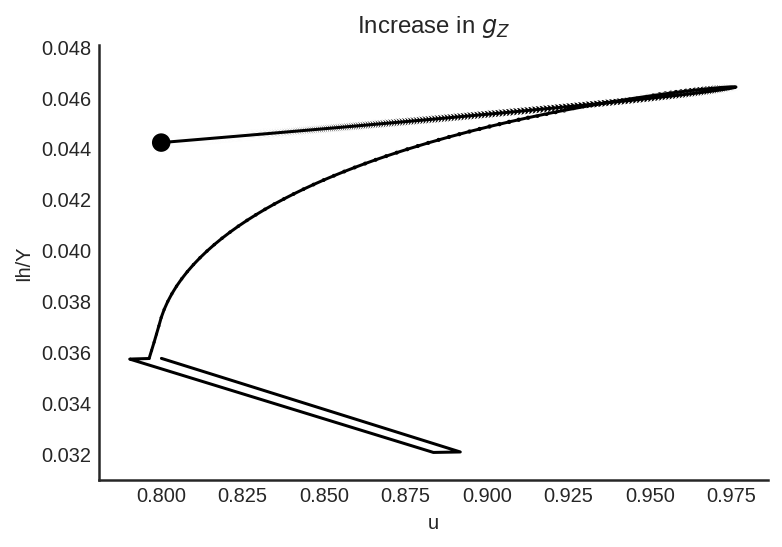

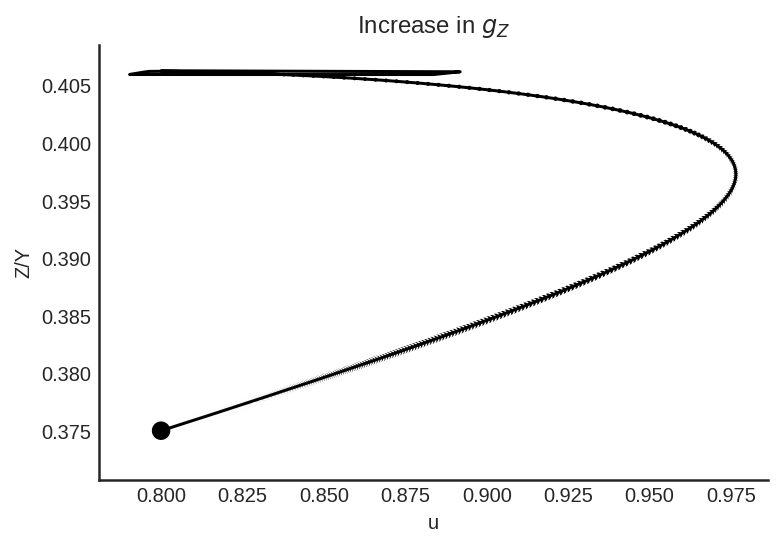

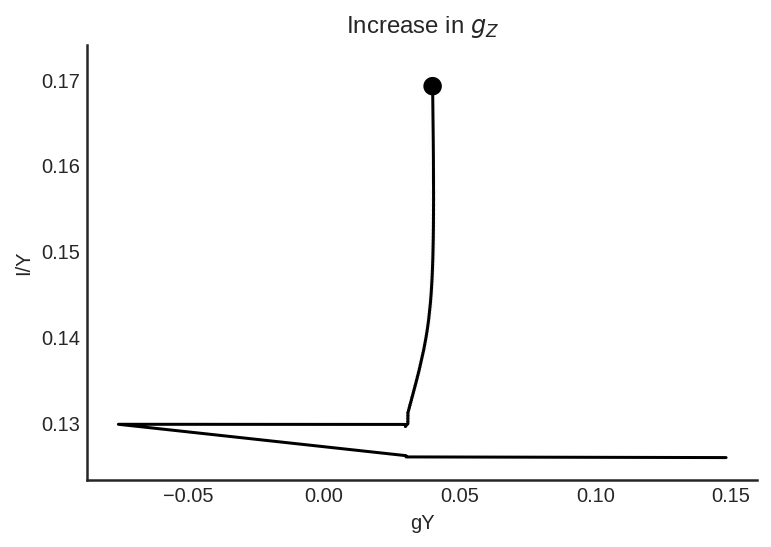

In [29]:
shock["TIME"] = [i+1 for i in range(len(shock.index))]
shock["Ih/Y"] = shock["I_h"]/shock["Y"]
shock["I/Y"] = shock["I_t"]/shock["Y"]
shock["Z/Y"] = shock["Z"]/shock["Y"]
shock["gY"] = shock["Y"].pct_change()

sns.scatterplot(y = 'Ih/Y', x='u', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Ih/Y', x='u', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'Z/Y', x='u', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'Z/Y', x='u', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

sns.scatterplot(y = 'I/Y', x='gY', data=shock, size="TIME", sizes = (1,100), color = 'black', legend=False)
sns.lineplot(y = 'I/Y', x='gY', data=shock, sort=False, color = 'black')
plt.title('Increase in $g_Z$')
sns.despine()
plt.show()

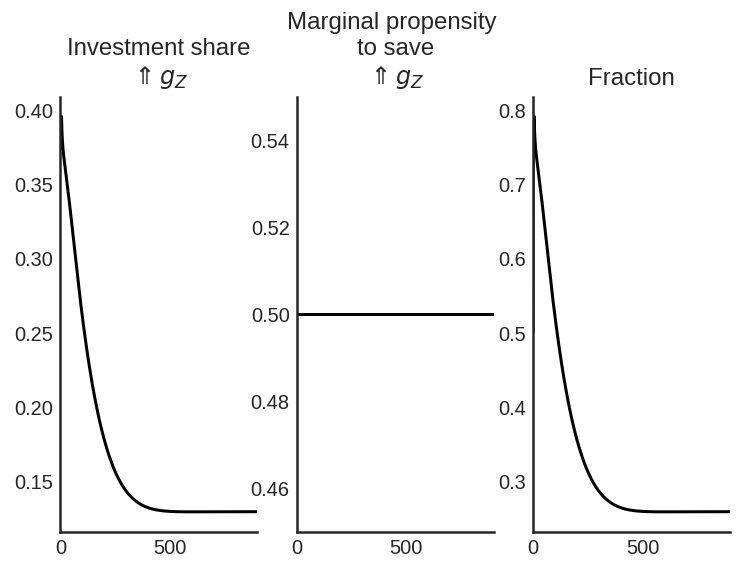

In [30]:
fig, ax = plt.subplots(1,3)

(df['I_t']/df['Y']).plot(title = 'Investment share\n$\\Uparrow g_Z$', color = 'black', ax = ax[0])
(1 - df['omega']).plot(title = 'Marginal propensity \nto save\n$\\Uparrow g_Z$', color = 'black', ax = ax[1])
ax[1].set_ylim(.45,.55)
(df['I_t']/(df['I_t'] + df['N'])).plot(title = 'Fraction', color = 'black', ax = ax[2])

sns.despine()
plt.show()

### Plots

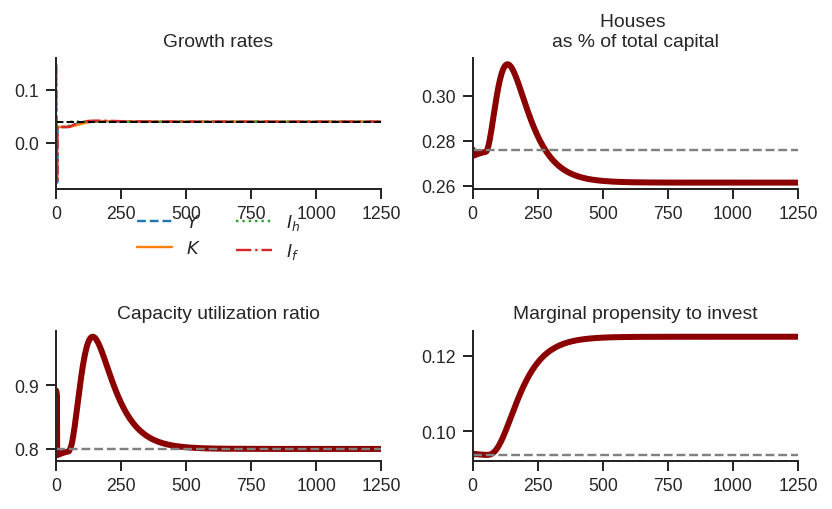

In [31]:
sns.set_context('paper')
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )
ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in autonomous growth rate ($g_z$)')
plt.show()



fig.savefig('Shock_1.png', dpi = 300)

## Increase in wage-share ($\omega$)

In [32]:
base = model()
df = SolveSFC(base, time=700)
shock = ShockModel(base_model=base, create_function=model(), variable='omegapar', increase=0.07, time = 900)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950
C,2.358281e+12,2.718818e+12,2.800716e+12,2.885069e+12,2.971952e+12,2.735167e+12,2.817164e+12,2.901649e+12,2.988660e+12,3.078285e+12,3.170599e+12,3.265687e+12,3.363617e+12,3.464495e+12,3.568397e+12,3.675419e+12,3.785629e+12,3.899161e+12,4.016099e+12,4.136544e+12,4.260603e+12,4.388382e+12,4.519995e+12,4.655557e+12,4.795184e+12,4.939000e+12,5.087131e+12,5.239713e+12,5.396856e+12,5.558721e+12,5.725442e+12,5.897164e+12,6.074038e+12,6.256236e+12,6.443881e+12,6.637145e+12,6.836217e+12,7.041251e+12,7.252463e+12,7.469976e+12,...,1.420798e+24,1.463422e+24,1.507325e+24,1.552544e+24,1.599121e+24,1.647094e+24,1.696507e+24,1.747402e+24,1.799825e+24,1.853827e+24,1.909448e+24,1.966717e+24,2.025718e+24,2.086490e+24,2.149085e+24,2.213567e+24,2.279976e+24,2.348369e+24,2.418831e+24,2.491378e+24,2.566120e+24,2.643103e+24,2.722396e+24,2.804068e+24,2.888190e+24,2.974836e+24,3.064089e+24,3.156004e+24,3.250684e+24,3.348204e+24,3.448650e+24,3.552110e+24,3.658673e+24,3.768433e+24,3.881503e+24,3.997931e+24,4.117869e+24,4.241405e+24,4.368647e+24,4.499706e+24
FD,9.697470e+11,1.094852e+12,1.128303e+12,1.162757e+12,1.198245e+12,1.126667e+12,1.160385e+12,1.195133e+12,1.230917e+12,1.267777e+12,1.305743e+12,1.344850e+12,1.385125e+12,1.426613e+12,1.469345e+12,1.513360e+12,1.558682e+12,1.605372e+12,1.653464e+12,1.702997e+12,1.754016e+12,1.806566e+12,1.860692e+12,1.916441e+12,1.973862e+12,2.033006e+12,2.093924e+12,2.156674e+12,2.221296e+12,2.287862e+12,2.356424e+12,2.427044e+12,2.499781e+12,2.574711e+12,2.651878e+12,2.731354e+12,2.813220e+12,2.897535e+12,2.984396e+12,3.073841e+12,...,4.873081e+23,5.019274e+23,5.169852e+23,5.324947e+23,5.484696e+23,5.649236e+23,5.818714e+23,5.993275e+23,6.173073e+23,6.358301e+23,6.549077e+23,6.745484e+23,6.947849e+23,7.156284e+23,7.370973e+23,7.592144e+23,7.819921e+23,8.054488e+23,8.296171e+23,8.544978e+23,8.801328e+23,9.065367e+23,9.337328e+23,9.617448e+23,9.905971e+23,1.020315e+24,1.050928e+24,1.082452e+24,1.114926e+24,1.148374e+24,1.182825e+24,1.218309e+24,1.254859e+24,1.292504e+24,1.331287e+24,1.371218e+24,1.412355e+24,1.454725e+24,1.498367e+24,1.543318e+24
FT,1.354463e+12,1.555118e+12,1.602104e+12,1.650499e+12,1.700345e+12,1.571466e+12,1.618552e+12,1.667079e+12,1.717053e+12,1.768530e+12,1.821551e+12,1.876167e+12,1.932412e+12,1.990353e+12,2.050031e+12,2.111502e+12,2.174795e+12,2.240002e+12,2.307165e+12,2.376342e+12,2.447595e+12,2.520984e+12,2.596575e+12,2.674434e+12,2.754628e+12,2.837227e+12,2.922305e+12,3.009942e+12,3.100192e+12,3.193157e+12,3.288911e+12,3.387537e+12,3.489122e+12,3.593773e+12,3.701544e+12,3.812538e+12,3.926872e+12,4.044625e+12,4.165939e+12,4.290856e+12,...,6.968913e+23,7.177980e+23,7.393320e+23,7.615119e+23,7.843573e+23,8.078880e+23,8.321246e+23,8.570884e+23,8.828010e+23,9.092910e+23,9.365743e+23,9.646606e+23,9.936004e+23,1.023408e+24,1.054111e+24,1.085741e+24,1.118315e+24,1.151860e+24,1.186424e+24,1.222003e+24,1.258663e+24,1.296423e+24,1.335316e+24,1.375375e+24,1.416637e+24,1.459136e+24,1.502916e+24,1.547997e+24,1.594437e+24,1.642270e+24,1.691538e+24,1.742284e+24,1.794553e+24,1.848390e+24,1.903854e+24,1.960956e+24,2.019785e+24,2.080379e+24,2.142790e+24,2.207074e+24
FU,6.464980e+11,7.299014e+11,7.522019e+11,7.751712e+11,7.988301e+11,7.511110e+11,7.735903e+11,7.967553e+11,8.206115e+11,8.451850e+11,8.704955e+11,8.965670e+11,9.234165e+11,9.510754e+11,9.795631e+11,1.008906e+12,1.039121e+12,1.070248e+12,1.102309e+12,1.135331e+12,1.169344e+12,1.204377e+12,1.240461e+12,1.277627e+12,1.315908e+12,1.355337e+12,1.395949e+12,1.437782e+12,1.480864e+12,1.525241e+12,1.570950e+12,1.618029e+12,1.666521e+12,1.716474e+12,1.767919e+12,1.820903e+12,1.875480e+12,1.931690e+12,1.989597e+12,2.049228e+12,...,3.248721e+23,3.346182e+23,3.446568e+23,3.549965e+23,3.6564

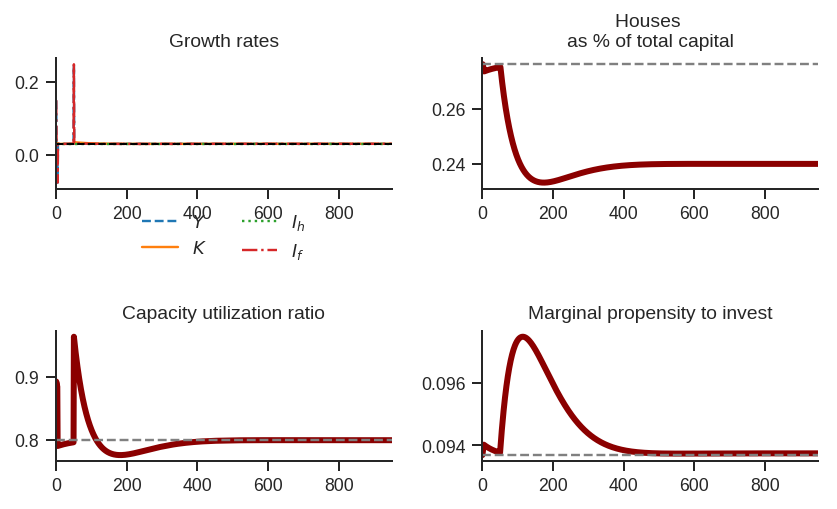

In [33]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )
ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in wage-share ($\omega$)')
plt.show()



fig.savefig('Shock_2.png', dpi = 300)

In [34]:
shock2 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock2.columns = ['$\Delta \omega$']
shock2

,$\Delta \omega$
alpha,1.000
g_Z,0.030
gamma_F,0.400
gamma_u,0.010
gk,0.030
h,0.094
infla,0.000
inflaparam,0.000
k,0.240
omega,0.570


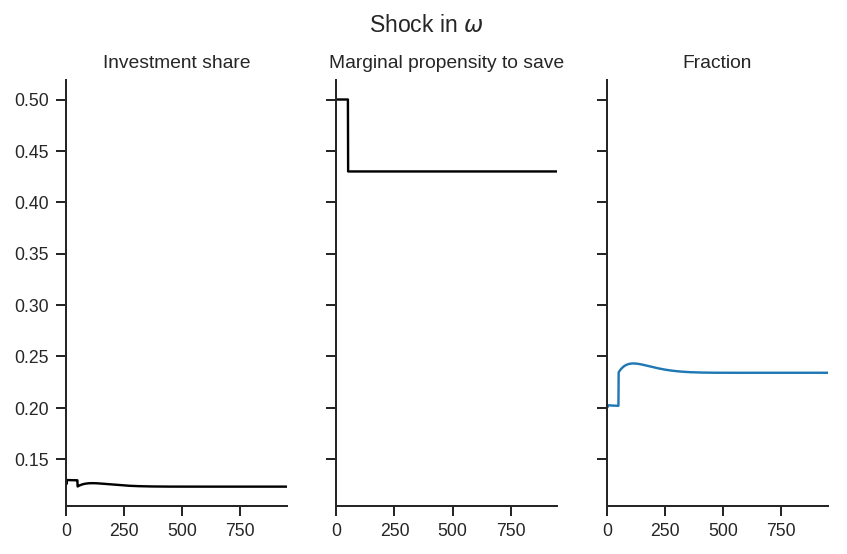

In [35]:
fig, ax = plt.subplots(1,3, sharey=True)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_f']/(shock['I_f'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in $\omega$')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

## Increase in interest rates

In [36]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='spread_mo', increase=0.005, time = 1000)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050
C,1.674160e+16,1.930106e+16,1.988244e+16,2.048125e+16,2.109802e+16,1.941706e+16,1.999917e+16,2.059886e+16,2.121657e+16,2.185288e+16,2.250812e+16,2.318310e+16,2.387832e+16,2.459440e+16,2.533195e+16,2.609171e+16,2.687410e+16,2.768004e+16,2.851020e+16,2.936522e+16,3.024597e+16,3.115292e+16,3.208722e+16,3.304953e+16,3.404072e+16,3.506164e+16,3.611318e+16,3.719627e+16,3.831184e+16,3.946088e+16,4.064449e+16,4.186353e+16,4.311899e+16,4.441223e+16,4.574427e+16,4.711627e+16,4.852943e+16,4.998498e+16,5.148419e+16,5.302856e+16,...,1.672100e+28,1.718083e+28,1.765330e+28,1.813877e+28,1.863759e+28,1.915012e+28,1.967675e+28,2.021786e+28,2.077385e+28,2.134513e+28,2.193212e+28,2.253526e+28,2.315497e+28,2.379174e+28,2.444601e+28,2.511827e+28,2.580903e+28,2.651877e+28,2.724804e+28,2.799736e+28,2.876729e+28,2.955839e+28,3.037132e+28,3.120646e+28,3.206471e+28,3.294641e+28,3.385244e+28,3.478338e+28,3.573992e+28,3.672277e+28,3.773264e+28,3.877029e+28,3.983648e+28,4.093198e+28,4.205761e+28,4.321419e+28,4.440258e+28,4.562365e+28,4.687830e+28,4.816746e+28
FD,6.884177e+15,7.772332e+15,8.009785e+15,8.254361e+15,8.506278e+15,7.998081e+15,8.237455e+15,8.484077e+15,8.738114e+15,8.999814e+15,9.269271e+15,9.546856e+15,9.832767e+15,1.012725e+16,1.043057e+16,1.074303e+16,1.106477e+16,1.139621e+16,1.173761e+16,1.208923e+16,1.245144e+16,1.282439e+16,1.320860e+16,1.360434e+16,1.401195e+16,1.443178e+16,1.486421e+16,1.530961e+16,1.576837e+16,1.624088e+16,1.672764e+16,1.722894e+16,1.774520e+16,1.827701e+16,1.882478e+16,1.938898e+16,1.997010e+16,2.056866e+16,2.118517e+16,2.182028e+16,...,7.028284e+27,7.221562e+27,7.420155e+27,7.624209e+27,7.833874e+27,8.049306e+27,8.270662e+27,8.498105e+27,8.731803e+27,8.971927e+27,9.218655e+27,9.472168e+27,9.732652e+27,1.000030e+28,1.027531e+28,1.055788e+28,1.084822e+28,1.114655e+28,1.145308e+28,1.176804e+28,1.209166e+28,1.242418e+28,1.276589e+28,1.311690e+28,1.347767e+28,1.384825e+28,1.422908e+28,1.462038e+28,1.502244e+28,1.543556e+28,1.586003e+28,1.629618e+28,1.674433e+28,1.720480e+28,1.767793e+28,1.816407e+28,1.866358e+28,1.917683e+28,1.970419e+28,2.024606e+28
FT,9.615983e+15,1.104051e+16,1.137408e+16,1.171764e+16,1.207150e+16,1.115651e+16,1.149081e+16,1.183525e+16,1.219004e+16,1.255556e+16,1.293188e+16,1.331957e+16,1.371889e+16,1.413019e+16,1.455382e+16,1.499023e+16,1.543958e+16,1.590248e+16,1.637931e+16,1.687040e+16,1.737631e+16,1.789717e+16,1.843379e+16,1.898651e+16,1.955580e+16,2.014217e+16,2.074613e+16,2.136821e+16,2.200894e+16,2.266890e+16,2.334874e+16,2.404891e+16,2.476993e+16,2.551270e+16,2.627776e+16,2.706576e+16,2.787740e+16,2.871339e+16,2.957445e+16,3.046153e+16,...,9.492755e+27,9.753806e+27,1.002204e+28,1.029764e+28,1.058083e+28,1.087180e+28,1.117077e+28,1.147797e+28,1.179361e+28,1.211794e+28,1.245118e+28,1.279359e+28,1.314541e+28,1.350691e+28,1.387835e+28,1.426001e+28,1.465216e+28,1.505509e+28,1.546910e+28,1.589451e+28,1.633160e+28,1.678072e+28,1.724227e+28,1.771635e+28,1.820363e+28,1.870415e+28,1.921851e+28,1.974702e+28,2.029007e+28,2.084804e+28,2.142136e+28,2.201045e+28,2.261574e+28,2.323767e+28,2.387671e+28,2.453332e+28,2.520798e+28,2.590120e+28,2.661349e+28,2.734536e+28
FU,4.589451e+15,5.181555e+15,5.339857e+15,5.502907e+15,5.670852e+15,5.332054e+15,5.491637e+15,5.656052e+15,5.825409e+15,5.999876e+15,6.179514e+15,6.364571e+15,6.555178e+15,6.751501e+15,6.953713e+15,7.162022e+15,7.376514e+15,7.597471e+15,7.825073e+15,8.059484e+15,8.300958e+15,8.549593e+15,8.805735e+15,9.069561e+15,9.341300e+15,9.621189e+15,9.909474e+15,1.020641e+16,1.051224e+16,1.082726e+16,1.115176e+16,1.148596e+16,1.183013e+16,1.218467e+16,1.254985e+16,1.292599e+16,1.331340e+16,1.371244e+16,1.412344e+16,1.454685e+16,...,4.685523e+27,4.814

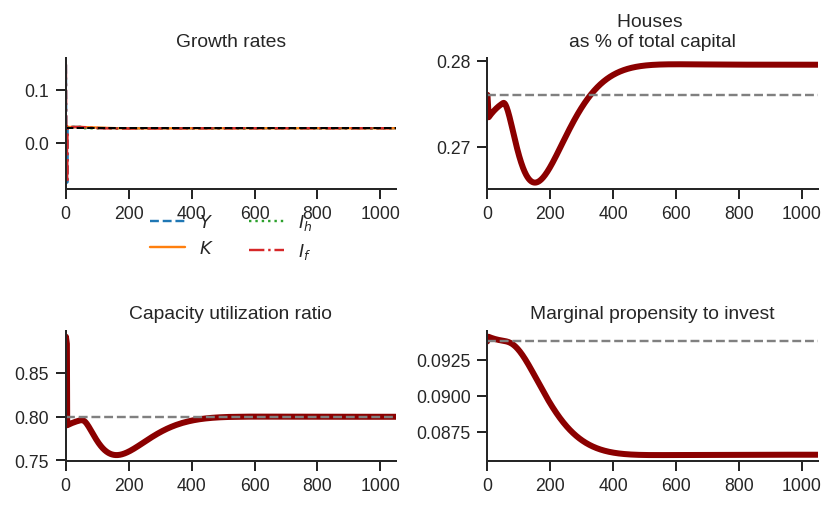

In [37]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )

ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
#ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")

sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in interest rates')
plt.show()

fig.savefig('Shock_3.png', dpi = 300)

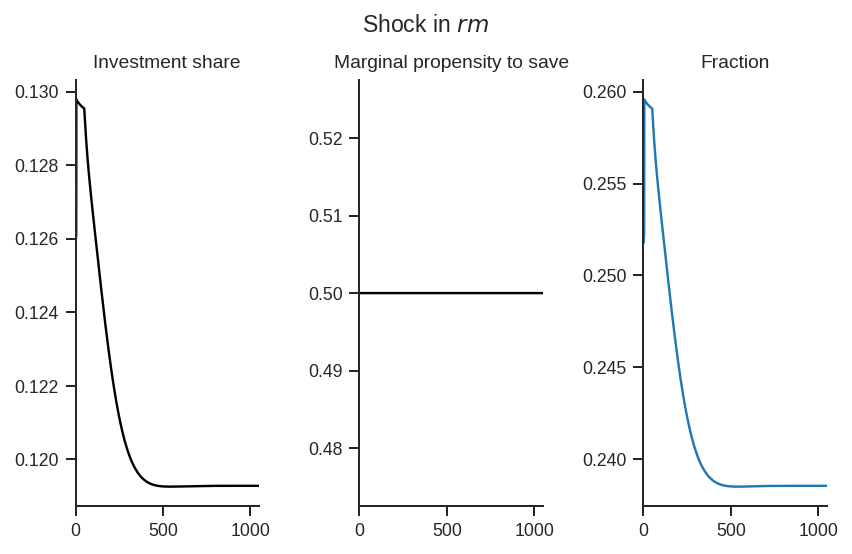

In [38]:
fig, ax = plt.subplots(1,3)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_t']/(shock['I_t'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in $rm$')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

In [39]:
shock3 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock3.columns = ['$\Delta rm$']
shock3

,$\Delta rm$
alpha,1.000
g_Z,0.028
gamma_F,0.400
gamma_u,0.010
gk,0.027
h,0.086
infla,0.000
inflaparam,0.000
k,0.280
omega,0.500


## Increase in inflation

In [40]:
base = model()
df = SolveSFC(base, time=1000)
shock = ShockModel(base_model=base, create_function=model(), variable='inflaparam', increase=0.0005, time = 500)
shock.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550
C,1.674160e+16,1.930106e+16,1.988244e+16,2.048125e+16,2.109802e+16,1.941706e+16,1.999917e+16,2.059886e+16,2.121657e+16,2.185288e+16,2.250812e+16,2.318310e+16,2.387832e+16,2.459440e+16,2.533195e+16,2.609171e+16,2.687410e+16,2.768004e+16,2.851020e+16,2.936522e+16,3.024597e+16,3.115292e+16,3.208722e+16,3.304953e+16,3.404072e+16,3.506164e+16,3.611318e+16,3.719627e+16,3.831184e+16,3.946088e+16,4.064449e+16,4.186353e+16,4.311899e+16,4.441223e+16,4.574427e+16,4.711627e+16,4.852943e+16,4.998498e+16,5.148419e+16,5.302856e+16,...,1.053963e+23,1.086912e+23,1.120891e+23,1.155932e+23,1.192069e+23,1.229336e+23,1.267771e+23,1.307401e+23,1.348273e+23,1.390424e+23,1.433892e+23,1.478719e+23,1.524947e+23,1.572621e+23,1.621785e+23,1.672486e+23,1.724772e+23,1.778693e+23,1.834300e+23,1.891645e+23,1.950783e+23,2.011770e+23,2.074663e+23,2.139523e+23,2.206411e+23,2.275390e+23,2.346531e+23,2.419884e+23,2.495537e+23,2.573564e+23,2.654013e+23,2.736985e+23,2.822552e+23,2.910794e+23,3.001795e+23,3.095641e+23,3.192421e+23,3.292227e+23,3.395153e+23,3.501297e+23
FD,6.884177e+15,7.772332e+15,8.009785e+15,8.254361e+15,8.506278e+15,7.998081e+15,8.237455e+15,8.484077e+15,8.738114e+15,8.999814e+15,9.269271e+15,9.546856e+15,9.832767e+15,1.012725e+16,1.043057e+16,1.074303e+16,1.106477e+16,1.139621e+16,1.173761e+16,1.208923e+16,1.245144e+16,1.282439e+16,1.320860e+16,1.360434e+16,1.401195e+16,1.443178e+16,1.486421e+16,1.530961e+16,1.576837e+16,1.624088e+16,1.672764e+16,1.722894e+16,1.774520e+16,1.827701e+16,1.882478e+16,1.938898e+16,1.997010e+16,2.056866e+16,2.118517e+16,2.182028e+16,...,4.231104e+22,4.363262e+22,4.499549e+22,4.640094e+22,4.785028e+22,4.934490e+22,5.088642e+22,5.247566e+22,5.411477e+22,5.580507e+22,5.754818e+22,5.934574e+22,6.119945e+22,6.311107e+22,6.508240e+22,6.711531e+22,6.921173e+22,7.137363e+22,7.360307e+22,7.590216e+22,7.827306e+22,8.071802e+22,8.323937e+22,8.583947e+22,8.852080e+22,9.128590e+22,9.413776e+22,9.707791e+22,1.001103e+23,1.032380e+23,1.064623e+23,1.097878e+23,1.132173e+23,1.167539e+23,1.204009e+23,1.241619e+23,1.280404e+23,1.320401e+23,1.361647e+23,1.404181e+23
FT,9.615983e+15,1.104051e+16,1.137408e+16,1.171764e+16,1.207150e+16,1.115651e+16,1.149081e+16,1.183525e+16,1.219004e+16,1.255556e+16,1.293188e+16,1.331957e+16,1.371889e+16,1.413019e+16,1.455382e+16,1.499023e+16,1.543958e+16,1.590248e+16,1.637931e+16,1.687040e+16,1.737631e+16,1.789717e+16,1.843379e+16,1.898651e+16,1.955580e+16,2.014217e+16,2.074613e+16,2.136821e+16,2.200894e+16,2.266890e+16,2.334874e+16,2.404891e+16,2.476993e+16,2.551270e+16,2.627776e+16,2.706576e+16,2.787740e+16,2.871339e+16,2.957445e+16,3.046153e+16,...,5.994601e+22,6.181850e+22,6.374949e+22,6.574081e+22,6.779432e+22,6.991199e+22,7.209616e+22,7.434784e+22,7.667023e+22,7.906517e+22,8.153492e+22,8.408182e+22,8.670829e+22,8.941680e+22,9.220992e+22,9.509030e+22,9.806066e+22,1.011238e+23,1.042826e+23,1.075402e+23,1.108994e+23,1.143637e+23,1.179361e+23,1.216202e+23,1.254193e+23,1.293371e+23,1.333780e+23,1.375437e+23,1.418403e+23,1.462720e+23,1.508403e+23,1.555523e+23,1.604115e+23,1.654224e+23,1.705899e+23,1.759189e+23,1.814143e+23,1.870814e+23,1.929255e+23,1.989522e+23
FU,4.589451e+15,5.181555e+15,5.339857e+15,5.502907e+15,5.670852e+15,5.332054e+15,5.491637e+15,5.656052e+15,5.825409e+15,5.999876e+15,6.179514e+15,6.364571e+15,6.555178e+15,6.751501e+15,6.953713e+15,7.162022e+15,7.376514e+15,7.597471e+15,7.825073e+15,8.059484e+15,8.300958e+15,8.549593e+15,8.805735e+15,9.069561e+15,9.341300e+15,9.621189e+15,9.909474e+15,1.020641e+16,1.051224e+16,1.082726e+16,1.115176e+16,1.148596e+16,1.183013e+16,1.218467e+16,1.254985e+16,1.292599e+16,1.331340e+16,1.371244e+16,1.412344e+16,1.454685e+16,...,2.820736e+22,2.908842e+22,2.999700e+22,3.093396e+22,3.1900

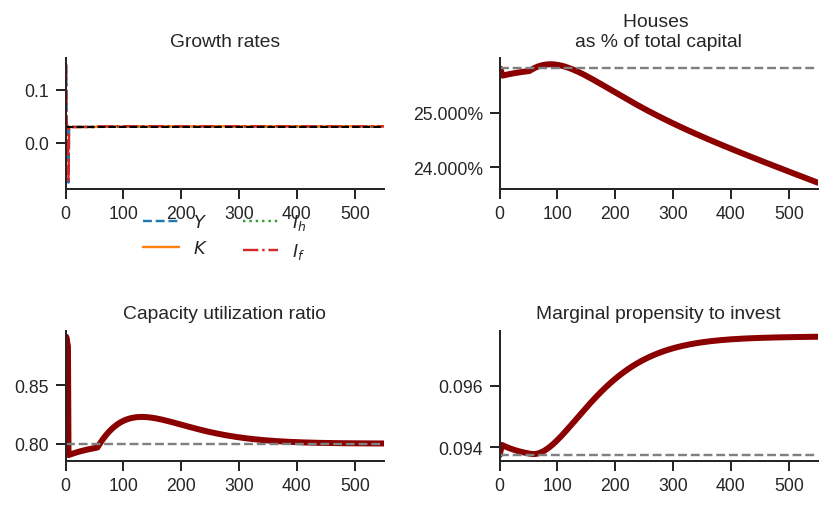

In [41]:
fig, ax = plt.subplots(2,2)

shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('--'),
                                                  )
shock[["Kreal"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-'),
                                                  )
shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = (':'),
                                                  )
shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                  ls = ('-.'),
                                                  )

ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
#ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
               labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
          fancybox=True, shadow=True, ncol=2)

shock['k'].plot(color = "darkred", title = "Houses \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
ax[0,1].axhline(y = df['k'].iloc[-1], ls ='--', color = "gray")
ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
#ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
ax[1,1].axhline(y = df['h'].iloc[-1], ls ='--', color = "gray")

sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle('Increase in interest rates')
plt.show()

fig.savefig('Shock_4.png', dpi = 300)

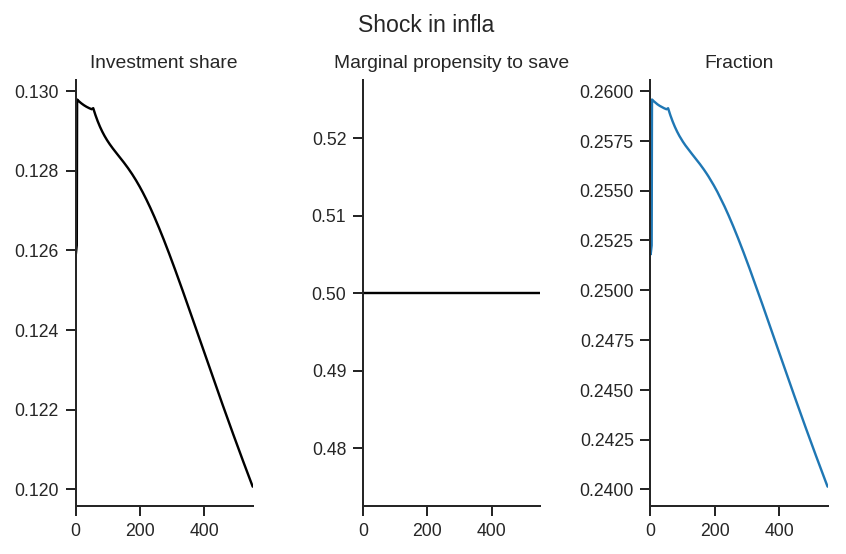

In [42]:
fig, ax = plt.subplots(1,3)

(shock['I_t']/shock['Y']).plot(title = 'Investment share', color = 'black', ax = ax[0])
ax[0].ticklabel_format(useOffset=False)
(1 - shock['omega']).plot(title = 'Marginal propensity to save', color = 'black', ax = ax[1])
ax[1].ticklabel_format(useOffset=False)
(shock['I_t']/(shock['I_t'] + shock['N'])).plot(title = 'Fraction')
ax[2].ticklabel_format(useOffset=False)

fig.suptitle('Shock in infla')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
sns.despine()
plt.show()

In [43]:
shock4 = shock.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
shock4.columns = ['$\Delta $ Infla']
shock4

,$\Delta $ Infla
alpha,1.000
g_Z,0.030
gamma_F,0.400
gamma_u,0.010
gk,0.031
h,0.098
infla,0.000
inflaparam,0.000
k,0.234
omega,0.500


# Shock yourself

In [44]:
df_ = SolveSFC(base, time=1000)

@interact(variable = df_.transpose().loc['alpha':,:].index, increase = (-1,1,0.01))
def shock_yourself(variable, increase):
  shock = ShockModel(base_model = base, create_function = model(), variable = variable, increase = increase)
  fig, ax = plt.subplots(2,2)

  shock[["Y"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('--'),
                                                    )
  shock[["K"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('-'),
                                                    )
  shock[["I_h"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = (':'),
                                                    )
  shock[["I_f"]].pct_change().plot(title = "Growth rates", ax = ax[0,0], 
                                                    ls = ('-.'),
                                                    )
  sns.set_context('paper')

  ax[0,0].axhline(y=shock["g_Z"].iloc[-1], color = "black", ls = "--", lw=1)
  #ax[0,0].set_yticklabels(['{:,.1%}'.format(x) for x in ax[0,0].get_yticks()])
  ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.06),
                 labels = ["$Y$", "$K$", "$I_h$", "$I_f$"],
            fancybox=True, shadow=True, ncol=2)
  
  shock['k'].plot(color = "darkred", title = "Housing \nas % of total capital", label = "$\k$", legend = False, ax = ax[0,1], lw = 3, )
  ax[0,1].axhline(y = df_['k'].iloc[-1], ls ='--', color = "gray")
  #ax[0,1].set_yticklabels(['{:,.3%}'.format(x) for x in ax[0,1].get_yticks()])


  shock['u'].plot(title = 'Capacity utilization ratio', ax=ax[1,0], legend = False, color = "darkred", lw = 3, )
  ax[1,0].axhline(y = shock['un'].iloc[-1], ls ='--', color = "gray")
  #ax[1,0].set_yticklabels(['{:,.2%}'.format(x) for x in ax[1,0].get_yticks()])

  shock['h'].plot(title = 'Marginal propensity to invest', ax=ax[1,1], legend = False, color = "darkred", lw = 3, )
  ax[1,1].axhline(y = df_['h'].iloc[-1], ls ='--', color = "gray")
  
  sns.despine()
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
  fig.suptitle('$\Delta$ {} = {}'.format(variable, increase))
  plt.show()



interactive(children=(Dropdown(description='variable', options=('alpha', 'g_Z', 'gamma_F', 'gamma_u', 'gk', 'h…

# Merging tables

In [45]:
df = df.round(decimals = 3).tail(1).transpose().loc['alpha':,:]
df.columns = ['Base scenario']
df

table = pd.merge(left = df, right = shock1, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock2, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock3, left_index = True, right_index = True)
table = pd.merge(left = table, right = shock4, left_index = True, right_index = True)
table.to_latex("table.tex", bold_rows = True, column_format = 'c', decimal = ',')
table

,Base scenario,$\Delta g_Z$,$\Delta \omega$,$\Delta rm$,$\Delta $ Infla
alpha,1.000,1.00000,1.000,1.000,1.000
g_Z,0.030,0.04000,0.030,0.028,0.030
gamma_F,0.400,0.40000,0.400,0.400,0.400
gamma_u,0.010,0.01000,0.010,0.010,0.010
gk,0.030,0.04000,0.030,0.027,0.031
h,0.094,0.12500,0.094,0.086,0.098
infla,0.000,0.00000,0.000,0.000,0.000
inflaparam,0.000,0.00000,0.000,0.000,0.000
k,0.276,0.26134,0.240,0.280,0.234
omega,0.500,0.50000,0.570,0.500,0.500


# Sobol

In [0]:
t2 = datetime.now()

In [47]:
import numpy as np
sobol = model()
bound = [i/100 for i in range(1,101)]
parameters = [i for i in sobol.parameters]
time, skip = 10, 10
df_sensibility = pd.DataFrame()

################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                gamma_F = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\gamma_F$"] = empty_list ################### Replace here
############################### End #####################################################

df_sensibility.index = df_sensibility.index/100
df_sensibility.head()

,$\gamma_F$
0.00,6.970070
0.01,6.970070
0.02,6.970068
0.03,6.970068
0.04,6.970068


In [48]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                alpha = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\\alpha$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$
0.00,6.970070,5.518772
0.01,6.970070,5.526240
0.02,6.970068,5.533766
0.03,6.970068,5.541352
0.04,6.970068,5.548999


In [49]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                omegapar = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\omega$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$
0.00,6.970070,5.518772,5.526242
0.01,6.970070,5.526240,5.541355
0.02,6.970068,5.533766,5.556708
0.03,6.970068,5.541352,5.572312
0.04,6.970068,5.548999,5.588174


In [50]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                gamma_u = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\gamma_u$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$
0.00,6.970070,5.518772,5.526242,6.970078
0.01,6.970070,5.526240,5.541355,7.301176
0.02,6.970068,5.533766,5.556708,inf
0.03,6.970068,5.541352,5.572312,inf
0.04,6.970068,5.548999,5.588174,inf


In [51]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                rm = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$rm$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$
0.00,6.970070,5.518772,5.526242,6.970078,7.045494
0.01,6.970070,5.526240,5.541355,7.301176,6.970078
0.02,6.970068,5.533766,5.556708,inf,6.894944
0.03,6.970068,5.541352,5.572312,inf,6.820093
0.04,6.970068,5.548999,5.588174,inf,6.745516


In [52]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                Theta = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\Theta$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$
0.00,6.970070,5.518772,5.526242,6.970078,7.045494,4.484815
0.01,6.970070,5.526240,5.541355,7.301176,6.970078,4.720995
0.02,6.970068,5.533766,5.556708,inf,6.894944,4.914986
0.03,6.970068,5.541352,5.572312,inf,6.820093,5.079878
0.04,6.970068,5.548999,5.588174,inf,6.745516,5.223444


In [53]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                phi_0 = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\phi_0$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$
0.00,6.970070,5.518772,5.526242,6.970078,7.045494,4.484815,6.523414
0.01,6.970070,5.526240,5.541355,7.301176,6.970078,4.720995,6.671224
0.02,6.970068,5.533766,5.556708,inf,6.894944,4.914986,6.820103
0.03,6.970068,5.541352,5.572312,inf,6.820093,5.079878,6.970078
0.04,6.970068,5.548999,5.588174,inf,6.745516,5.223444,7.121193


In [54]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                phi_1 = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\phi_1$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$,$\phi_1$
0.00,6.970070,5.518772,5.526242,6.970078,7.045494,4.484815,6.523414,7.118159
0.01,6.970070,5.526240,5.541355,7.301176,6.970078,4.720995,6.671224,7.115128
0.02,6.970068,5.533766,5.556708,inf,6.894944,4.914986,6.820103,7.112095
0.03,6.970068,5.541352,5.572312,inf,6.820093,5.079878,6.970078,7.109062
0.04,6.970068,5.548999,5.588174,inf,6.745516,5.223444,7.121193,7.106030


In [55]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                phparam = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["$\\xi$"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$,$\phi_1$,$\xi$
0.00,6.970070,5.518772,5.526242,6.970078,7.045494,4.484815,6.523414,7.118159,6.970078
0.01,6.970070,5.526240,5.541355,7.301176,6.970078,4.720995,6.671224,7.115128,6.970078
0.02,6.970068,5.533766,5.556708,inf,6.894944,4.914986,6.820103,7.112095,6.970078
0.03,6.970068,5.541352,5.572312,inf,6.820093,5.079878,6.970078,7.109062,6.970078
0.04,6.970068,5.548999,5.588174,inf,6.745516,5.223444,7.121193,7.106030,6.970078


In [56]:
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                infla = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility["infla"] = empty_list ################### Replace here
df_sensibility.head()
############################### End #####################################################

,$\gamma_F$,$\alpha$,$\omega$,$\gamma_u$,$rm$,$\Theta$,$\phi_0$,$\phi_1$,$\xi$,infla
0.00,6.970070,5.518772,5.526242,6.970078,7.045494,4.484815,6.523414,7.118159,6.970078,7.466489
0.01,6.970070,5.526240,5.541355,7.301176,6.970078,4.720995,6.671224,7.115128,6.970078,7.940235
0.02,6.970068,5.533766,5.556708,inf,6.894944,4.914986,6.820103,7.112095,6.970078,8.407074
0.03,6.970068,5.541352,5.572312,inf,6.820093,5.079878,6.970078,7.109062,6.970078,8.878411
0.04,6.970068,5.548999,5.588174,inf,6.745516,5.223444,7.121193,7.106030,6.970078,9.364095


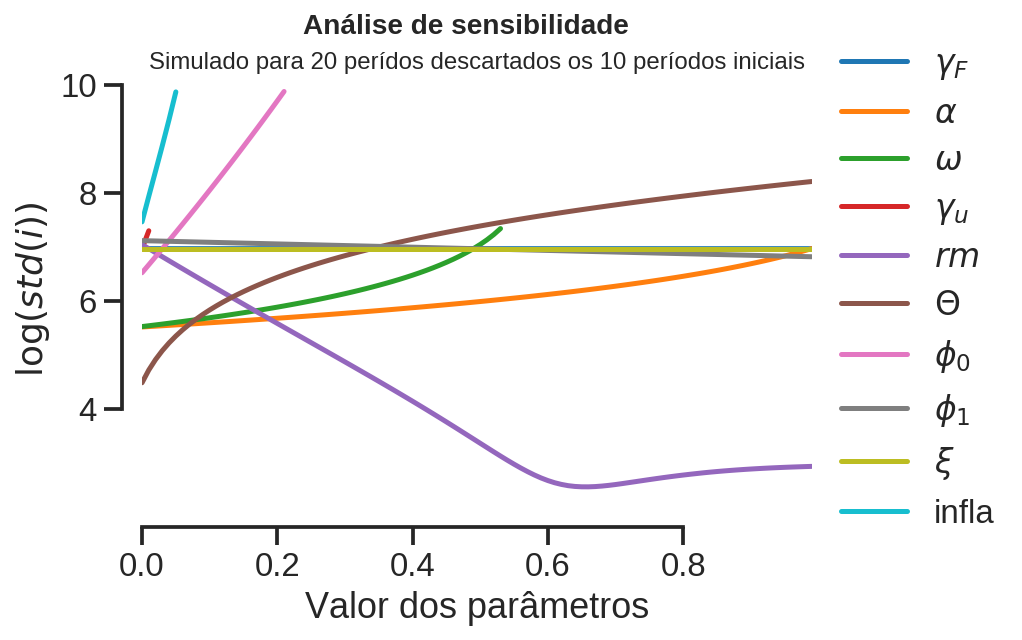

In [57]:
sns.set_context('talk')
fig, ax = plt.subplots()

df_sensibility.plot(
    ax = ax,
    lw = 2.5
)
ax.ticklabel_format(useOffset=False)
ax.set_ylabel("$\log(std(i))$")
ax.set_xlabel("Valor dos parâmetros")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("Análise de sensibilidade", fontsize = 14, weight="bold")
ax.set_title("Simulado para {} perídos descartados os {} períodos iniciais".format(time+skip,skip), fontsize = 12, y = .98)

sns.despine(offset=10, trim=True);

ylim = ax.get_ylim()


plt.show()

In [58]:
#bound = [i/100 for i in range(1,101)] ################################ Changed
bound = [i/100 + 2.0 for i in range(1,101)]
################################# Start ########################################
empty_list = [i for i in range(len(bound))]  
for i in range(len(bound)):
  try:
    val = np.log(
        SolveSFC(
            model(
                v = bound[i] ################### Replace here
                 ), 
                 time=time+skip)["Y"][skip:].std()
    )
    empty_list[i] = val
  except Exception as e:
    val = np.infty
    empty_list[i] = val
    pass
df_sensibility_v = pd.DataFrame()
df_sensibility_v["$v$"] = empty_list ################### Replace here
df_sensibility_v.index = df_sensibility_v.index/100 + 2.0
df_sensibility_v.head()
############################### End #####################################################

,$v$
2.00,6.838237
2.01,6.840687
2.02,6.843145
2.03,6.845613
2.04,6.848093


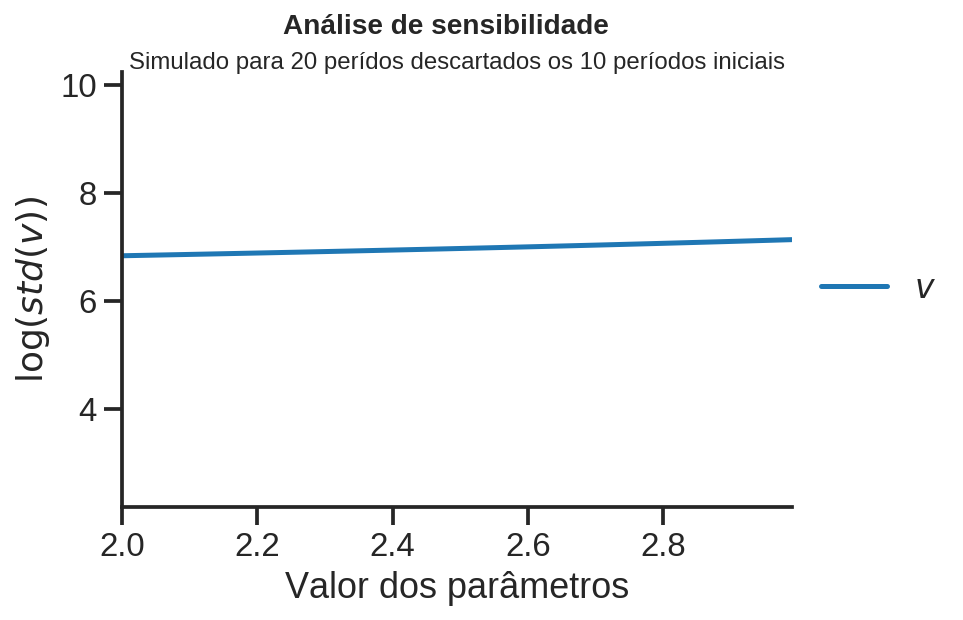

In [59]:
sns.set_context('talk')
fig, ax = plt.subplots()

df_sensibility_v.plot(
    ax = ax,
    lw = 2.5, 
)
ax.ticklabel_format(useOffset=False)
ax.set_ylabel("$\log(std(v))$")
ax.set_xlabel("Valor dos parâmetros")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim(ylim)

fig.suptitle("Análise de sensibilidade", fontsize = 14, weight="bold")
ax.set_title("Simulado para {} perídos descartados os {} períodos iniciais".format(time+skip,skip), fontsize = 12, y = .98)

sns.despine()
plt.show()

# Dag

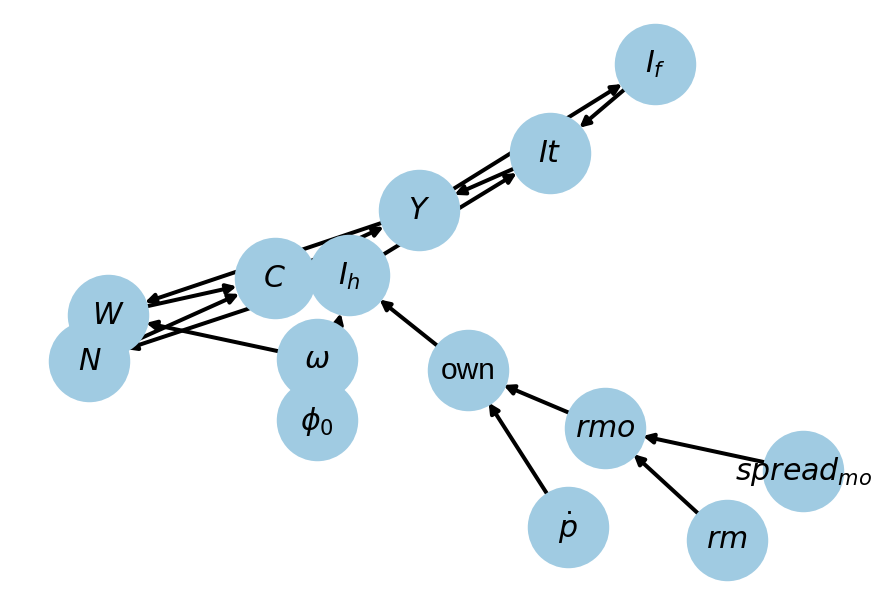

In [60]:
df = pd.DataFrame(
    {
        'Determinada' : [
            '$Y$', # 1
            '$Y$', # 2
            '$C$', # 3
            '$C$', # 4
            '$W$', # 5
            '$N$', # 6
            '$It$', # 7
            '$It$', # 8
            '$I_h$', # 9
            'own', # 10
            'own', # 11
            '$I_f$', # 12
            '$I_h$', # 13
            '$rmo$', # 14
            '$rmo$', # 15,
            '$W$', # 16
        ], 
        'Determina' : [
            '$C$',  # 1
            '$It$', # 2
            '$W$', # 3
            '$N$', # 4
            '$\omega$', # 5
            '$I_h$', # 6
            '$I_f$', # 7
            '$I_h$', # 8
            'own', # 9
            '$\dot p$', # 10
            '$rmo$', # 11
            '$Y$', # 12,
            '$\phi_0$', # 13
            '$rm$', # 14
            '$spread_{mo}$', # 15
            '$Y$', # 16
        ]
}
)
 
# Build your graph
G=nx.from_pandas_edgelist(
    df, 
    'Determina', 
    'Determinada', 
    create_using=nx.DiGraph() # To use with arrows
)
 
# Plot it
nx.draw(
    G, 
    with_labels=True, 
    node_color='#A0CBE2', 
    node_size=1500, 
    edge_color='black', 
    linewidths=2,
    width=2,
    arrows=True,
    font_size=15,
    alpha=1,
    #pos=nx.spring_layout(G),
    pos=nx.fruchterman_reingold_layout(G),
    #pos=nx.shell_layout(G),
)

plt.show()

# Finishing

In [61]:
print("Total running time: ", datetime.now() - t1)
print("Simulation running time: ", t2 - t1)
print("Sobol running time: ", datetime.now() - t2)

Total running time:  0:10:26.511790
Simulation running time:  0:01:00.007050
Sobol running time:  0:09:26.511231


# TODO

- Corrigir path plot
- Testar variável aleatória
- Testar AR
- Corrigir solução analítica
- Preço e valor dos estoque

# Analytical solution

In [0]:
base_eq = model()
SolveSFC(base_eq, time=1, table = False)
t = sp.Symbol('t')
initials = {
    key: base_eq.evaluate(key) for key in base_eq.parameters
}
initials.update({key: base_eq.evaluate(key) for key in base_eq.variables})

Model variables

In [0]:
for i in base_eq.variables:
  globals()["_" + i] = sp.Function(i)

Model parameters

In [0]:
for i in base_eq.parameters:
  globals()[i] = sp.symbols(i, positive=True)

Defining equations

## General equations

In [0]:
Y = _C(t) + _I_t(t)
I = _I_f(t) + _I_h(t)
Yk = _K_f(t-1)/v
u = _Y(t)/_Yk(t)
Z = _I_h(t)
W = _omega(t)*_Y(t)
K = _K_HD(t) + _K_f(t)

## Households

In [0]:
C = alpha*_W(t)
YD = _W(t) + _FD(t) + rm*_M(t-1) - _rmo(t)*_MO(t-1)
S_h = _YD(t) - _C(t)
dMO = _I_h(t)
V_h = _M(t) + _K_HD(t) - _MO(t)
NFW_h = _S_h(t) - _I_h(t)

## Firms

In [0]:
I_f = _h(t)*_Y(t)
dK_f = _I_f(t)
L = _I_f(t) - _FU(t) + _L(t-1)
FT = _FU(t) + _FD(t)
FU = gamma_F*(_FT(t) - _rl(t)*_L(t-1))
FD = (1 - gamma_F)*(_FT(t) - _rl(t)*_L(t-1))
h = _h(t-1)*gamma_u*(_u(t)-un) + _h(t-1)
NFW_f = _FU(t) - _I_f(t)
V_f = _K_f(t) - _L(t)

## Banks

In [0]:
M = (_L(t) - _L(t-1)) + (_MO(t) - _MO(t-1)) + _M(t-1)
rmo = rm + spread_mo
rl = rm + spread_l
V_b = _L(t) + _MO(t) - _M(t)
NFW_b = _rl(t)*_L(t-1) + _rmo(t)*_MO(t-1) - rm*_M(t-1)

## Residential Investment

In [0]:
K_HS = _K_HD(t)
Is = _I_h(t)
dK_HD = _I_h(t)*_ph(t-1) + _K_HD(t-1)*(_ph(t) - _ph(t-1))
#dK_HD = _I_h(t)
I_h = (1+_g_Z(t))*_I_h(t-1)
k = _K_HD(t-1)/(_Kreal(t-1))
#infla = (_ph(t) - _ph(t-1))/_ph(t-1)
infla = inflaparam
ph = (1+_infla(t))*_ph(t-1)
own = ((1+_rmo(t))/(1+_infla(t)))-1
g_Z = phi_0 - phi_1*_own(t)

# Rearranging

## Level of GDP

In [70]:
EqY = Y - _Y(t)
EqY = EqY.subs(_C(t), C).subs(_I_t(t), I)
EqY = EqY.subs(_I_f(t), I_f)
EqY = EqY.subs(_W(t), W)
EqY = EqY.subs(_I_h(t), I_h)

EqY = EqY.subs(_g_Z(t), g_Z)
EqY = EqY.subs(_own(t), own)
EqY = EqY.subs(_infla(t), infla)
EqY = sp.solve(EqY, _Y(t))[0].collect(alpha).collect(omegapar)
solY = EqY

print('Y = ', solY)


print('dY/d alpha = ', EqY.diff(alpha))
print('dY/d omega = ', EqY.diff(_omega(t)))
print('dY/d phi_0 = ', EqY.diff(phi_0).collect(alpha).collect(_omega(t)))
print('dY/d phi_1 = ', EqY.diff(phi_1).collect(alpha).collect(_omega(t)))

print("\nGowth rate.....")
gY, h_, gz_ = sp.symbols('gY h gZ')
gY_ = omegapar*gY + h_*gY + h_ + (_Z(t)/_Y(t))*_g_Z(t) - _h(t-1) - gY
gY_ = gY_.subs(_g_Z(t), gz_)
print("gY = ", sp.solve(gY_, gY)[0].collect(_Y(t)), "\nReplacing...")
gY_ = sp.simplify(gY_.subs(_Y(t), _Z(t)*solY/_I_h(t)).subs(_g_Z(t), gz_))
print("gY = ", sp.solve(gY_, gY)[0].collect(gz_))
    
print("\nReplacing the initial values.....")


def replacer(express):
  express = express.subs(alpha, df.loc[discart+2, 'alpha']).subs(_omega(t), df.loc[discart+2, 'omega'])
  express  = express.subs(un, df.loc[discart+1, 'un']).subs(gamma_u, df.loc[discart+1, 'gamma_u'])
  express = express.subs(_u(t), df.loc[discart+2, 'u']).subs(_h(t-1), df.loc[discart+1, 'h'])
  express = express.subs(own, df.loc[discart+2, 'own']).subs(inflaparam, df.loc[discart+1, 'infla']).subs(_I_h(t-1), df.loc[discart+1, 'I_h'])
  express = express.subs(phi_0, df.loc[discart+1, 'phi_0']).subs(phi_1, df.loc[discart+1, 'phi_1']).subs(rm, df.loc[discart+1, 'rm']).subs(spread_mo, df.loc[discart+1, 'spread_mo'])
  express = express.subs(_h(t), df.loc[discart+1, 'h']).subs(_rmo(t), df.loc[discart+1, 'rmo']).subs(rm, df.loc[discart+1, 'rm']).subs(spread_mo, df.loc[discart+1, 'spread_mo'])
  express = express.subs(_I_h(t), df.loc[discart+1, 'I_h']).subs(gz_, df.loc[discart+1, 'g_Z'])
  return express

discart = 30
df = SolveSFC(model(), time = discart+20)
df = df.iloc[discart:,:]
EqY = replacer(EqY)
print('Y = ', df.loc[discart, 'Y'])
print('Yhat = ', EqY)
print('hat Y - Y1 = {:.2f}'.format(EqY - df.loc[discart, "Y"]))


print('gY Derivatives values\n')
print('d gY/d alpha > 0?', replacer(gY_.diff(alpha))>0)
print('d gY/d omega > 0?', replacer(gY_.diff(_omega(t)))> 0)
print('d gY/d phi_0 > 0?', replacer(gY_.diff(phi_0)) > 0)
print('d gY/d phi_1 > 0?', replacer(gY_.diff(phi_1)) > 0)



Y =  (-inflaparam*phi_0 - inflaparam*phi_1 - inflaparam - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(alpha*(inflaparam*omega(t) + omega(t)) + inflaparam*h(t) - inflaparam + h(t) - 1)
dY/d alpha =  (-inflaparam*omega(t) - omega(t))*(-inflaparam*phi_0 - inflaparam*phi_1 - inflaparam - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(alpha*(inflaparam*omega(t) + omega(t)) + inflaparam*h(t) - inflaparam + h(t) - 1)**2
dY/d omega =  -alpha*(inflaparam + 1)*(-inflaparam*phi_0 - inflaparam*phi_1 - inflaparam - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(alpha*(inflaparam*omega(t) + omega(t)) + inflaparam*h(t) - inflaparam + h(t) - 1)**2
dY/d phi_0 =  (-inflaparam - 1)*I_h(t - 1)/(alpha*(inflaparam + 1)*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1)
dY/d phi_1 =  (-inflaparam + rmo(t))*I_h(t - 1)/(alpha*(inflaparam + 1)*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1)

Gowth rate.....
gY =  (-gZ*Z(t) + (-h + h(t - 1))*Y(t))/((h + omegapar - 1)*Y(t)) 
Replacing...
gY =  (gZ*(alpha*inflaparam*I_h(t)*omega(t) 

## Capacity output ratio (short-run)

$$
\frac{Y}{K(-1)} = \frac{Y}{K(-1)}\frac{Yk}{Yk} = \frac{u}{v}
$$

$$
\therefore u = \frac{Y}{K(-1)}v
$$

$$
i_{h_t} = \frac{I_h}{K_{t-1}}
$$

$$
K(-1) = (1+g_K(-1))\cdot K(-2)
$$

In [71]:
Equ = Y - _Y(t)
Equ = Equ.subs(_C(t), _C(t)*v/_K_f(t-1)).subs(_I_t(t), _I_t(t)*v/_K_f(t-1)).subs(_Y(t), _u(t))
Equ = Equ.subs(_C(t), C).subs(_I_t(t), I)
Equ = Equ.subs(_I_f(t), I_f)
Equ = Equ.subs(_W(t), W)
Equ = Equ.expand()
Equ = Equ.subs(_Y(t)/_K_f(t-1), _u(t)/v)
i_h = sp.Function('i_h')
Equ = Equ.subs(_I_h(t)/_K_f(t-1), i_h(t))
Equ = Equ.collect(_u(t))
Equ = Equ.subs(_W(t), W)
Equ = sp.solve(Equ, _u(t))[0].factor().collect(alpha*omegapar).collect(_h(t)).collect(1+_gk(t-1))
Equ = Equ.subs(_I_h(t)/_K_f(t-1), i_h(t))
solu = Equ.collect(alpha**2).collect(omegapar).collect(_YD(t)).collect(alpha)
Equ = Equ.subs(_Y(t), EqY)
print('u = ', solu)
print('\nDerivatives')
print('du/d alpha = ', Equ.diff(alpha))
print('du/d omega = ', Equ.diff(omegapar))

print("\nReplacing the initial values.....")
Equ = replacer(Equ)


print('u0 = ', df.loc[discart,'u'].round(3))
print('u1 = ', Equ)
print("hat u - u1 = ", (df.loc[discart+1,'u'] - Equ))

u =  -v*i_h(t)/(alpha*omega(t) + h(t) - 1)

Derivatives
du/d alpha =  v*i_h(t)*omega(t)/(alpha*omega(t) + h(t) - 1)**2
du/d omega =  0

Replacing the initial values.....
u0 =  0.527
u1 =  5.77187140434365*v*i_h(t)
hat u - u1 =  -5.77187140434365*v*i_h(t) + 0.513990169656804


In [72]:
sp.latex(solu).replace("omegapar", "\\omega")
print(solu)

-v*i_h(t)/(alpha*omega(t) + h(t) - 1)


$$
u_{SR} = 
- \frac{v \operatorname{i_{h}}{\left (t \right )}}{\alpha \omega + h{\left (t \right )} - 1}
$$

Rerranging

$$
u_{SR} =  \frac{v\cdot i_h(t)}{1 - \alpha\cdot \omega - h(t)}
$$

Consider $k$ as the fraction between capacity generating capital and total capital (including households' capital):

$$
k = \frac{K_f}{K}
$$

The capacity utilization ration can be definede as:

$$
u = \frac{Y\cdot v}{K \cdot k}
$$

So, dividing Y by houseolds' capital is the same as:

$$
\frac{Y}{(1-k)\cdot K}
$$

Multiplying by $v$:


$$
\frac{Y}{(1-k)\cdot K}\cdot v = \frac{Y\cdot v}{K}\cdot \left(\frac{1}{1-k}\right)
$$

Multiplying and dividing by $k$:

$$
\frac{Y\cdot v}{K\cdot k}\cdot \left(\frac{k}{1-k}\right) = u \cdot \left(\frac{k}{1-k}\right)
$$

Therefore,

$$
Y\frac{v}{K_h} =  u \cdot \left(\frac{k}{1-k}\right)
$$

In [73]:
k, gz = sp.symbols('k g_Z')
solY = solY.subs(_I_h(t), _I_h(t)*v/_K_HD(t)).subs(_I_h(t)/_K_HD(t), gz)
solY = solY - _u(t)*((k)/(1-k))
u_SR = sp.solve(solY, _u(t))[0]
print((u_SR))

(inflaparam*k*phi_0 + inflaparam*k*phi_1 + inflaparam*k - inflaparam*phi_0 - inflaparam*phi_1 - inflaparam + k*phi_0 - k*phi_1*rmo(t) + k - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(k*(alpha*inflaparam*omega(t) + alpha*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1))


$$
u_{SR} = \frac{gz v \left(k - 1\right)}{k \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
k = \frac{gz v \left(k - 1\right)}{u_{SR} \left(\alpha \omega{\left (t \right )} + h{\left (t \right )} - 1\right)}
$$

$$
\frac{k}{1-k} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

$$
\frac{K_f}{K_H} = \frac{gz v}{u_{SR} \left(1-\alpha \omega{\left (t \right )} - h{\left (t \right )}\right)}
$$

In [74]:
Equ = u_SR
print('u = ', Equ)
print('\nDerivatives')
print('du/d alpha = ', Equ.diff(alpha))
print('du/d omega = ', Equ.diff(omegapar))
print('du/d k = ', Equ.diff(k))

print("\nReplacing the initial values.....")
Equ = replacer(Equ)
Equ = Equ.subs('k', df.loc[discart+1,'k'])

print('u0 = ', df.loc[discart,'u'].round(3))
print('u1 = ', Equ)
print("hat u - u1 = ", (df.loc[discart+1,'u'] - Equ))

u =  (inflaparam*k*phi_0 + inflaparam*k*phi_1 + inflaparam*k - inflaparam*phi_0 - inflaparam*phi_1 - inflaparam + k*phi_0 - k*phi_1*rmo(t) + k - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(k*(alpha*inflaparam*omega(t) + alpha*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1))

Derivatives
du/d alpha =  (-inflaparam*omega(t) - omega(t))*(inflaparam*k*phi_0 + inflaparam*k*phi_1 + inflaparam*k - inflaparam*phi_0 - inflaparam*phi_1 - inflaparam + k*phi_0 - k*phi_1*rmo(t) + k - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(k*(alpha*inflaparam*omega(t) + alpha*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1)**2)
du/d omega =  0
du/d k =  (inflaparam*phi_0 + inflaparam*phi_1 + inflaparam + phi_0 - phi_1*rmo(t) + 1)*I_h(t - 1)/(k*(alpha*inflaparam*omega(t) + alpha*omega(t) + inflaparam*h(t) - inflaparam + h(t) - 1)) - (inflaparam*k*phi_0 + inflaparam*k*phi_1 + inflaparam*k - inflaparam*phi_0 - inflaparam*phi_1 - inflaparam + k*phi_0 - k*phi_1*rmo(t) + k - phi_0 + phi_1*rmo(t) - 1)*I_h(t - 1)/(k**2*(alp